In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

In [15]:
data = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/final/metricas.csv")
metricas = data[data['collection'] == "C61"]
metricas = metricas[metricas['region'] == "latam"]
metricas_R2 = metricas[metricas['metrica'] == "r2"]
metricas_reu = metricas[metricas['metrica'] == "reu"]
metricas_bias = metricas[metricas['metrica'] == "bias"]
metricas_rmse = metricas[metricas['metrica'] == "rmse"]
metricas_R2

,region,num,estacion,metrica,temporal,espacial,valor,collection,min,max
730,latam,1,SP,r2,30,1,0.83,C61,0.0,0.0
731,latam,1,SP,r2,60,1,0.79,C61,0.0,0.0
732,latam,1,SP,r2,90,1,0.77,C61,0.0,0.0
733,latam,1,SP,r2,120,1,0.75,C61,0.0,0.0
738,latam,1,SP,r2,30,3,0.71,C61,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
957,latam,6,MX,r2,120,15,0.60,C61,0.0,0.0
962,latam,6,MX,r2,30,25,0.56,C61,0.0,0.0
963,latam,6,MX,r2,60,25,0.54,C61,0.0,0.0
964,latam,6,MX,r2,90,25,0.55,C61,0.0,0.0


In [58]:
metricas.metrica.unique()

array(['bias', 'media', 'n', 'nrmse', 'r2', 'reu', 'rmse', 'sd',
       'rmse promedio espacial', 'reu promedio espacial',
       'r2 promedio espacial', 'bias promedio espacial',
       'nrmse promedio espacial'], dtype=object)

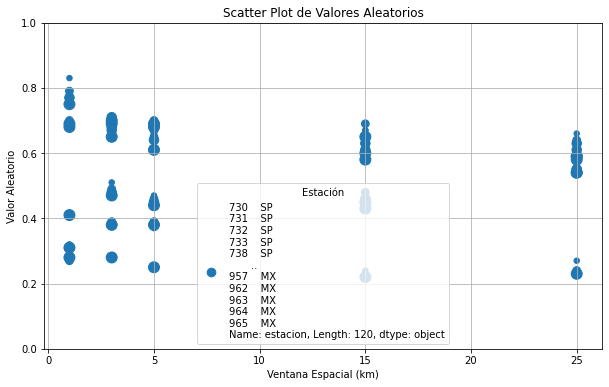

In [8]:



# Definir las estaciones, ventanas temporales y espaciales
estaciones = ['SP', 'ST', 'BA', 'MD', 'LP', 'MX']
ventanas_temporales = [30, 60, 90, 120]
ventanas_espaciales = [1, 3, 5, 15, 25]

# Generar los valores aleatorios para cada combinación de estación, ventana temporal y espacial


# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(metricas_R2['espacial'], metricas_R2['valor'], s=metricas_R2['temporal'],c= label=metricas_R2['estacion'])

# Configurar límites y etiquetas de los ejes
plt.ylim(0, 1)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.title("Scatter Plot de Valores Aleatorios")
plt.xlabel("Ventana Espacial (km)")
plt.ylabel("Valor Aleatorio")
plt.legend(title='Estación')
plt.grid(True)

# Mostrar el gráfico
plt.show()

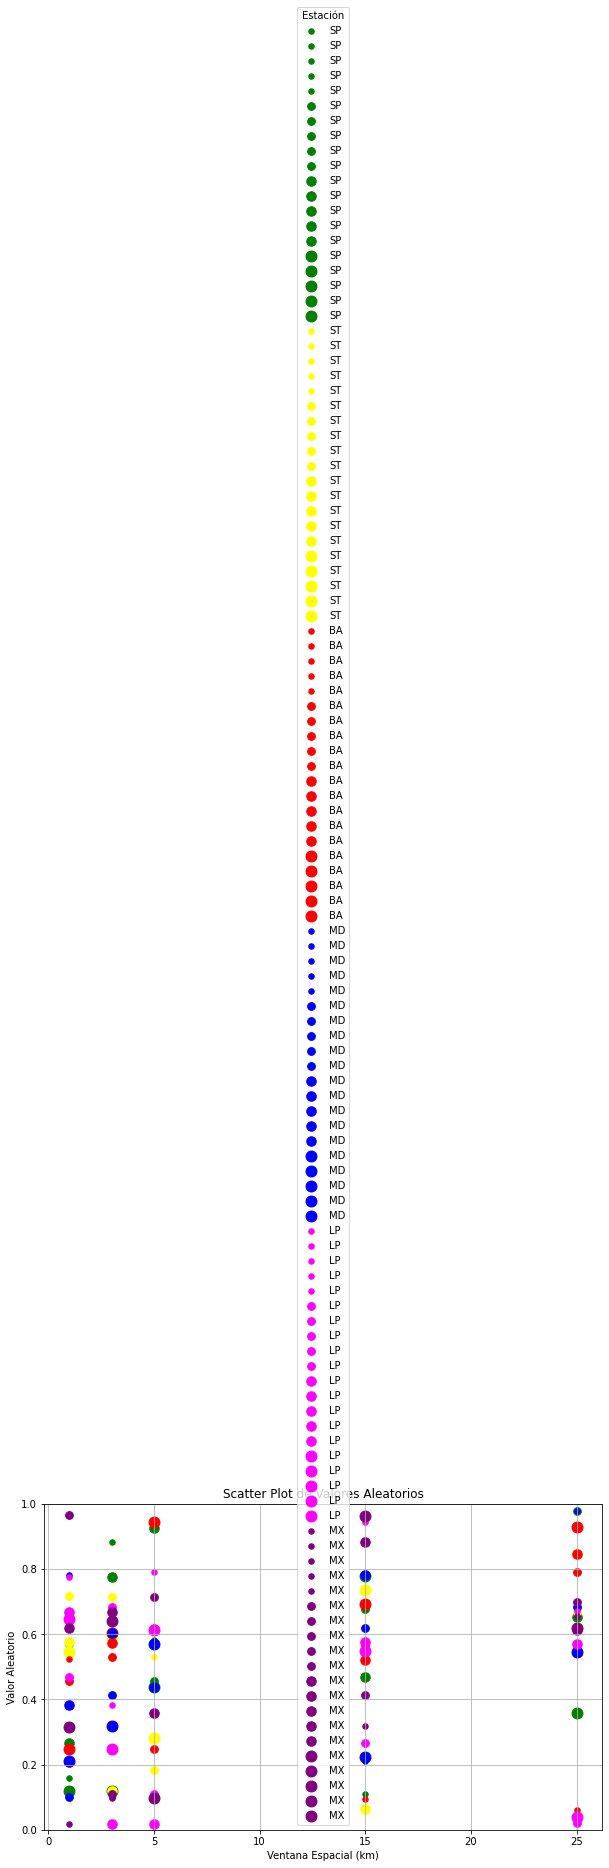

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las estaciones, ventanas temporales y espaciales
estaciones = ['SP', 'ST', 'BA', 'MD', 'LP', 'MX']
ventanas_temporales = [30, 60, 90, 120]
ventanas_espaciales = [1, 3, 5, 15, 25]

# Generar valores aleatorios para cada combinación de estación, ventana temporal y espacial
np.random.seed(0)
valores = np.random.rand(len(estaciones) * len(ventanas_temporales) * len(ventanas_espaciales))

# Definir colores para cada estación
colores = {'BA': 'red', 'SP': 'green', 'ST': 'yellow', 'MD': 'blue', 'MX': 'purple', 'LP': 'magenta'}

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
for estacion in estaciones:
    for ventana_temporal in ventanas_temporales:
        for ventana_espacial in ventanas_espaciales:
            plt.scatter(ventana_espacial, valores[np.random.randint(len(valores))], s=ventana_temporal, color=colores[estacion], label=estacion)

# Configurar límites y etiquetas de los ejes
plt.ylim(0, 1)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.title("Scatter Plot de Valores Aleatorios")
plt.xlabel("Ventana Espacial (km)")
plt.ylabel("Valor Aleatorio")
plt.legend(title='Estación')
plt.grid(True)

# Mostrar el gráfico
plt.show()

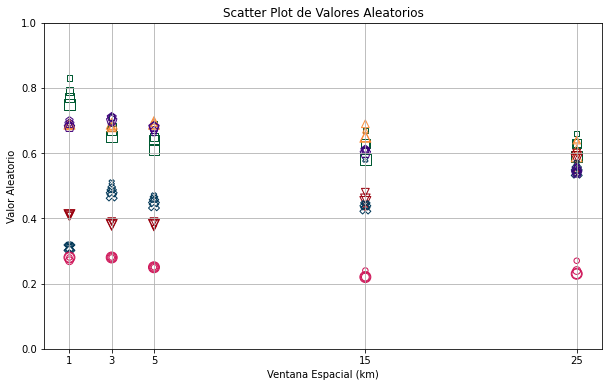

In [17]:

# Definir las estaciones y los colores correspondientes
# colores = {'BA': 'red', 'SP': 'green', 'ST': 'yellow', 'MD': 'blue', 'MX': 'purple', 'LP': 'magenta'}
colores = {'SP':"#005a32",'ST':"#fd8d3c","BA":"#99000d","MD":"#023858","LP":"#ce1256","MX":"#3f007d"} # CHILE "#fd8d3c"
shapes = {'SP': 's', 'ST': '^', 'BA': 'v', 'MD': 'X',"LP":"o","MX":"p"}
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
for index, row in metricas_R2.iterrows():
#     plt.scatter(row['espacial'], row['valor'], s=row['temporal'], color=colores[row['estacion']], label=row['estacion'])
     plt.scatter(row['espacial'], row['valor'], marker=shapes[row['estacion']],s=row['temporal'], color=colores[row['estacion']], label=row['estacion'],facecolor='none')

# Configurar límites y etiquetas de los ejes
plt.ylim(0, 1)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.title("Scatter Plot de Valores Aleatorios")
plt.xticks([1,3,5,15,25])
plt.xlabel("Ventana Espacial (km)")
plt.ylabel("Valor Aleatorio")
# plt.legend(title='Estación')
plt.grid(True)

# Mostrar el gráfico
plt.show()

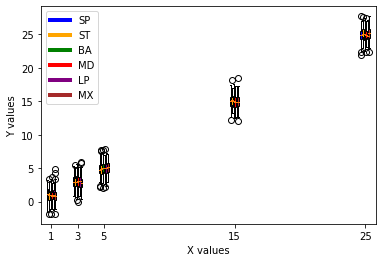

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tenemos los siguientes datos
np.random.seed(0)
data = {
    'SP': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'ST': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'BA': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'MD': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'LP': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'MX': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]]
}

# Asignar un color a cada grupo
colors = {
    'SP': 'blue',
    'ST': 'orange',
    'BA': 'green',
    'MD': 'red',
    'LP': 'purple',
    'MX': 'brown'
}

# Crear una figura
fig, ax = plt.subplots()

# Crear un offset para cada grupo
offset = np.linspace(-0.3, 0.3, len(data))

# Graficar los boxplots
for i, (group, values) in enumerate(data.items()):
    positions = [x + offset[i] for x in [1, 3, 5, 15, 25]]
    box = ax.boxplot(values, positions=positions, widths=0.15, patch_artist=True,
                     boxprops=dict(facecolor=colors[group]))

# Personalizar el gráfico
ax.set_xticks([1, 3, 5, 15, 25])
ax.set_xticklabels([1, 3, 5, 15, 25])
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.legend([plt.Line2D([0], [0], color=colors[group], lw=4) for group in data.keys()], data.keys())

plt.show()

Text(0, 0.5, 'Y values')

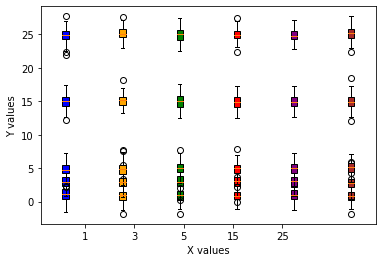

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tenemos los siguientes datos
np.random.seed(0)
data = {
    'SP': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'ST': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'BA': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'MD': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'LP': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'MX': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]]
}

# Asignar un color a cada grupo
colors = {
    'SP': 'blue',
    'ST': 'orange',
    'BA': 'green',
    'MD': 'red',
    'LP': 'purple',
    'MX': 'brown'
}

# Crear una figura
fig, ax = plt.subplots()

# Definir las posiciones en el eje x como categorías discretas
x_categories = ['1', '3', '5', '15', '25']

# Ancho total de cada grupo de boxplots y el ancho de cada boxplot
total_width = 0.8
group_width = total_width / len(data)
offsets = np.linspace(-total_width / 2, total_width / 2, len(data))

# Graficar los boxplots
for i, (group, values) in enumerate(data.items()):
    positions = [i + offsets[i] for _ in range(len(x_categories))]
    ax.boxplot(values, positions=positions, widths=group_width, patch_artist=True,
               boxprops=dict(facecolor=colors[group]))

# Personalizar el gráfico
ax.set_xticks(range(len(x_categories)))
ax.set_xticklabels(x_categories)
ax.set_xlabel('X values')
ax.set_ylabel('Y values')

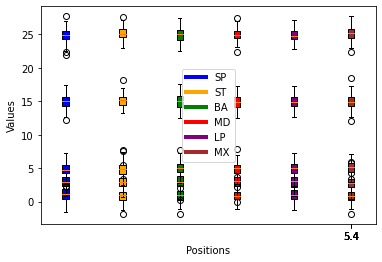

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tenemos los siguientes datos
np.random.seed(0)

# Generar datos de ejemplo
cities = ['SP', 'ST', 'BA', 'MD', 'LP', 'MX']
positions = ["1", "3", "5", "15", "25"]

data = {
    'SP': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'ST': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'BA': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'MD': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'LP': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
    'MX': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]]
}

# Colores para cada ciudad
colors = {
    'SP': 'blue',
    'ST': 'orange',
    'BA': 'green',
    'MD': 'red',
    'LP': 'purple',
    'MX': 'brown'
}

# Crear una figura
fig, ax = plt.subplots()

# Ancho total de cada grupo de boxplots y el ancho de cada boxplot
total_width = 0.8
group_width = total_width / len(cities)
offsets = np.linspace(-total_width / 2, total_width / 2, len(cities))

# Graficar los boxplots
for i, (city, values) in enumerate(data.items()):
#     positions = [pos + offsets[i] for pos in positions]
    positions = [i + offsets[i] for _ in range(len(x_categories))]
    ax.boxplot(values, positions=positions, widths=group_width, patch_artist=True,
               boxprops=dict(facecolor=colors[city]))

# Personalizar el gráfico
ax.set_xticks(positions)
ax.set_xticklabels(positions)
ax.set_xlabel('Positions')
ax.set_ylabel('Values')

# Añadir la leyenda
legend_handles = [plt.Line2D([0], [0], color=colors[city], lw=4, label=city) for city in cities]
ax.legend(handles=legend_handles, loc='best')

plt.show()

In [30]:
metricas_R2.columns
unique_values = metricas_R2['estacion'].unique().astype(str).tolist()
unique_values

['SP', 'ST', 'BA', 'MD', 'LP', 'MX']

[5.4, 5.4, 5.4, 5.4, 5.4]


ValueError: The number of FixedLocator locations (30), usually from a call to set_ticks, does not match the number of labels (5).

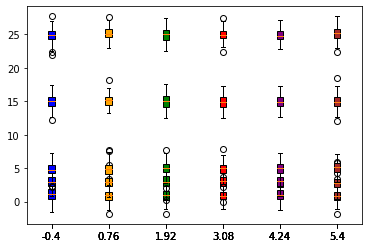

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tenemos los siguientes datos
np.random.seed(0)

# Generar datos de ejemplo
cities =  metricas_R2['estacion'].unique().astype(str).tolist()
positions = metricas_R2['espacial'].unique().astype(str).tolist()#["1", "3", "5", "15", "25"]
x_categories  = metricas_R2['espacial'].unique().astype(str).tolist()
# data = {
#     'SP': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
#     'ST': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
#     'BA': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
#     'MD': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
#     'LP': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]],
#     'MX': [np.random.normal(loc=x, scale=1, size=120) for x in [1, 3, 5, 15, 25]]
# }

# Colores para cada ciudad
colors = {
    'SP': 'blue',
    'ST': 'orange',
    'BA': 'green',
    'MD': 'red',
    'LP': 'purple',
    'MX': 'brown'
}

# Crear una figura
fig, ax = plt.subplots()

# Ancho total de cada grupo de boxplots y el ancho de cada boxplot
total_width = 0.8
group_width = total_width / len(cities)
offsets = np.linspace(-total_width / 2, total_width / 2, len(cities))

# Graficar los boxplots
for i, (city, values) in enumerate(data.items()):
#     positions = [pos + offsets[i] for pos in positions]
    positions = [i + offsets[i] for _ in range(len(x_categories))]
    ax.boxplot(values, positions=positions, widths=group_width, patch_artist=True,
               boxprops=dict(facecolor=colors[city]))
print(positions)
# Personalizar el gráfico
# ax.set_xticks(x_categories)
ax.set_xticklabels(x_categories)
ax.set_xlabel('Positions')
ax.set_ylabel('Values')

# Añadir la leyenda
legend_handles = [plt.Line2D([0], [0], color=colors[city], lw=4, label=city) for city in cities]
ax.legend(handles=legend_handles, loc='best')

plt.show()

In [55]:
metricas_reu


,region,num,estacion,metrica,temporal,espacial,valor,collection,min,max
970,latam,1,SP,reu,30,1,52.76,C61,0.0,0.0
971,latam,1,SP,reu,60,1,53.01,C61,0.0,0.0
972,latam,1,SP,reu,90,1,53.77,C61,0.0,0.0
973,latam,1,SP,reu,120,1,56.08,C61,0.0,0.0
978,latam,1,SP,reu,30,3,52.29,C61,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1197,latam,6,MX,reu,120,15,41.78,C61,0.0,0.0
1202,latam,6,MX,reu,30,25,59.83,C61,0.0,0.0
1203,latam,6,MX,reu,60,25,60.27,C61,0.0,0.0
1204,latam,6,MX,reu,90,25,58.66,C61,0.0,0.0


In [76]:
import seaborn as sns
met =  metricas[metricas["metrica"]== 'r2 promedio espacial']
met2 =  metricas[metricas["metrica"]== 'r2']
# # Box plot por grupo
# sns.scatterplot(y = met["valor"],
#             x = met["espacial"],
#             hue = met["estacion"])
# sns.lineplot(y = met["valor"],
#             x = met["espacial"],
#             hue = met["estacion"])


<ipython-input-80-f5feb3f9f0eb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-f5feb3f9f0eb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



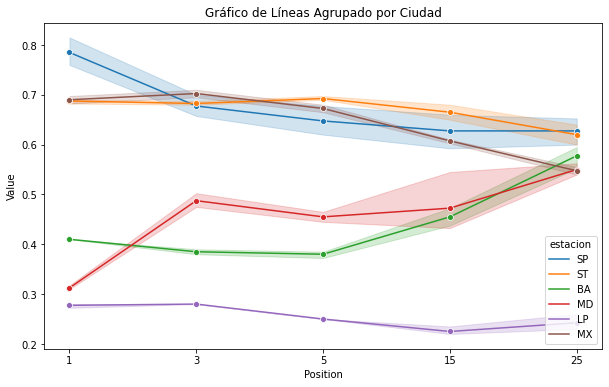

In [80]:
# Convertir 'Position' a un tipo categórico
met['espacial2'] = met['espacial'].astype(str)
met2['espacial2'] = met2['espacial'].astype(str)
plt.figure(figsize=(10, 6))
# sns.lineplot(data=met, x='espacial2', y='valor', hue='estacion', marker='o')
sns.lineplot(data=met2, x='espacial2', y='valor', hue='estacion', marker='o')
# Personalizar el gráfico
plt.title('Gráfico de Líneas Agrupado por Ciudad')
plt.xlabel('Position')
plt.ylabel('Value')

# Mostrar el gráfico
plt.show()

In [62]:
metricas

,region,num,estacion,metrica,temporal,espacial,valor,collection,min,max
4,latam,1,SP,bias,30,1,-0.0400,C61,0.00,0.00
5,latam,1,SP,bias,60,1,-0.0400,C61,0.00,0.00
6,latam,1,SP,bias,90,1,-0.0400,C61,0.00,0.00
7,latam,1,SP,bias,120,1,-0.0400,C61,0.00,0.00
12,latam,1,SP,bias,30,3,-0.0300,C61,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1749,latam,6,MX,nrmse promedio espacial,0,15,0.3525,C61,0.35,0.36
1751,latam,6,MX,nrmse promedio espacial,0,25,0.4125,C61,0.41,0.42
4144,latam,4,MD,r2 promedio espacial,0,25,0.5500,C61,0.54,0.57
4152,latam,5,LP,r2 promedio espacial,0,25,0.2425,C61,0.23,0.27


In [48]:
# import plotly.express as px
# fig = px.violin(metricas_rmse, y = 'valor', color = 'estacion',group="espacial")

# fig.show()

fig = px.violin(metricas_rmse, y = 'valor',  x = 'espacial', color = 'estacion', box = True)
#                 color_discrete_map = {'G1': '#66C2A5', 'G2': '#FC8D62', 'G3': '#8DA0CB'})

fig.show()

In [2]:
# AERONET station time series
def aeronet_plot (path, date_format,nrows,ncols,colors,plot):
    '''
    The function allows plotting the daily averages of each AERONET station.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each of AERONET's stations For example: 
    colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
    
    '''
    i=0 
    j=0 
#     fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,6),dpi=500)
    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,8),dpi=500)
    colors = ["#00441b","#ec7014","#ef6548","#045a8d","#dd3497","#807dba"]
    colores = ["#99d8c9","#fec44f","#fc8d59", "#a6bddb","#f768a1","#bcbddc"]
    #fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,8),dpi=500)
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        # Media diaria
        #data_mean  = data.resample('1D').mean()
        data_mean_maiac  = data['AOD_550_maiac_mean'].resample('1M').mean()
        data_mean_aer  = data['AOD_550_AER_mean'].resample('1M').mean()
        
        

        #data_mean  = data['aod_550'].resample('1M').mean()
        #The days of the study period are completed
        data_mean_period_maiac = data_mean_maiac ['2015-01-01':'2022-12-31']
        data_mean_period_aer = data_mean_aer ['2015-01-01':'2022-12-31']
        data_mean_period_len =len(data_mean_maiac.dropna(how='all'))
        # Station Name
        station_name = files [2:4]
        print(files)
        #mean = data_mean_period['aod_550'].mean()    
        mean_maiac = data_mean_period_maiac.mean()
        mean_aer = data_mean_period_aer.mean()
       
        ########################                PLOT                ########################
        # Figure
        #ax[i][j].plot(data_mean_period.index, data_mean_period.aod_550,c=colors[p])
        ax[i][j].plot(data_mean_period_maiac.index, data_mean_maiac,label= "MAIAC",c=colors[p])
        ax[i][j].plot(data_mean_period_aer.index, data_mean_aer,label="AERONET",c=colores[p])
         
              
        # Daily average text
#         ax[i][j].text(data_mean_period.index[1],1.3, "Average =" +" "+ str(round(data_mean_period['aod_550'].mean(),2)),  
#             ha="left", va="center",fontdict={'family': 'serif', 
#             'color' : 'Black',
#             'size': 9})
        ax[i][j].text(data_mean_period_maiac.index[1],1.6, "Average =" +" "+ str(round(data_mean_period_maiac.mean(),2)),  
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            'size': 13})
        
        # Daily average line
        ax[i][j].axhline(y=mean_maiac, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
        
        # Daily lenth text
        ax[i][j].text(data_mean_period_maiac.index[1],1.45, "sd =" +" "+ str(round(mean_maiac.std(),2)), 
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            #'weight': 'bold',
            'size': 13})
        ax[i][j].text(data_mean_period_maiac.index[1],1.30, "n =" +" "+ str(data_mean_period_len),  
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            #'weight': 'bold',
            'size': 13})
        # Axes names
        #ax[i][j].set_xlabel(r'$AOD_{Date}$',size=10)
        ax[i][j].set_xlabel(r'Date',size=13)
        ax[i][j].set_ylabel(r'$AOD_{AERONET}$',size=13)
        
        #Ticks
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.85, 0.4))
        
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=13,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 20})
        # Day fotmat
        Format = mdates.DateFormatter('%m-%y')
        ax[i][j].xaxis.set_major_formatter(Format)
        ax[i][j].xaxis.set_major_locator(ticker.AutoLocator())
        ax[i][j].xaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax[i][j].set_ylim(0,1.8)
        #ax[i][j].set_xlim('01-2015','12-2022')

        ax[i][j].set_xlim(pd.Timestamp('2014-10-01'), pd.Timestamp('2023-02-28'))
        #ax[i][j].set_xlim(pd.Timestamp('2014-10-01'), pd.Timestamp('2023-01-01'))
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,
                   bottom=0.15, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.2, 
                   hspace=0.4)
        
#         plt.subplots_adjust(left=0.15,
#                     bottom=0.17, 
#                     right=1.1, 
#                     top=1.1, 
#                     wspace=0.4, 
#                     hspace=0.6)
        
        # Location of data in each subplot
        print(station_name)

        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
   # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("aeronet_plot2.jpg", dpi=500))
    else:
        return(plt.show())

1_SP-1km-MAIAC-60-AER_MEAN_c61.csv
SP
2_ST-1km-MAIAC-60-AER_MEAN_c61.csv
ST
3_BA-1km-MAIAC-60-AER_MEAN_c61.csv
BA
4_MD-1km-MAIAC-60-AER_MEAN_c61.csv
MD
5_LP-1km-MAIAC-60-AER_MEAN_c61.csv
LP
6_MX-1km-MAIAC-60-AER_MEAN_c61.csv
MX


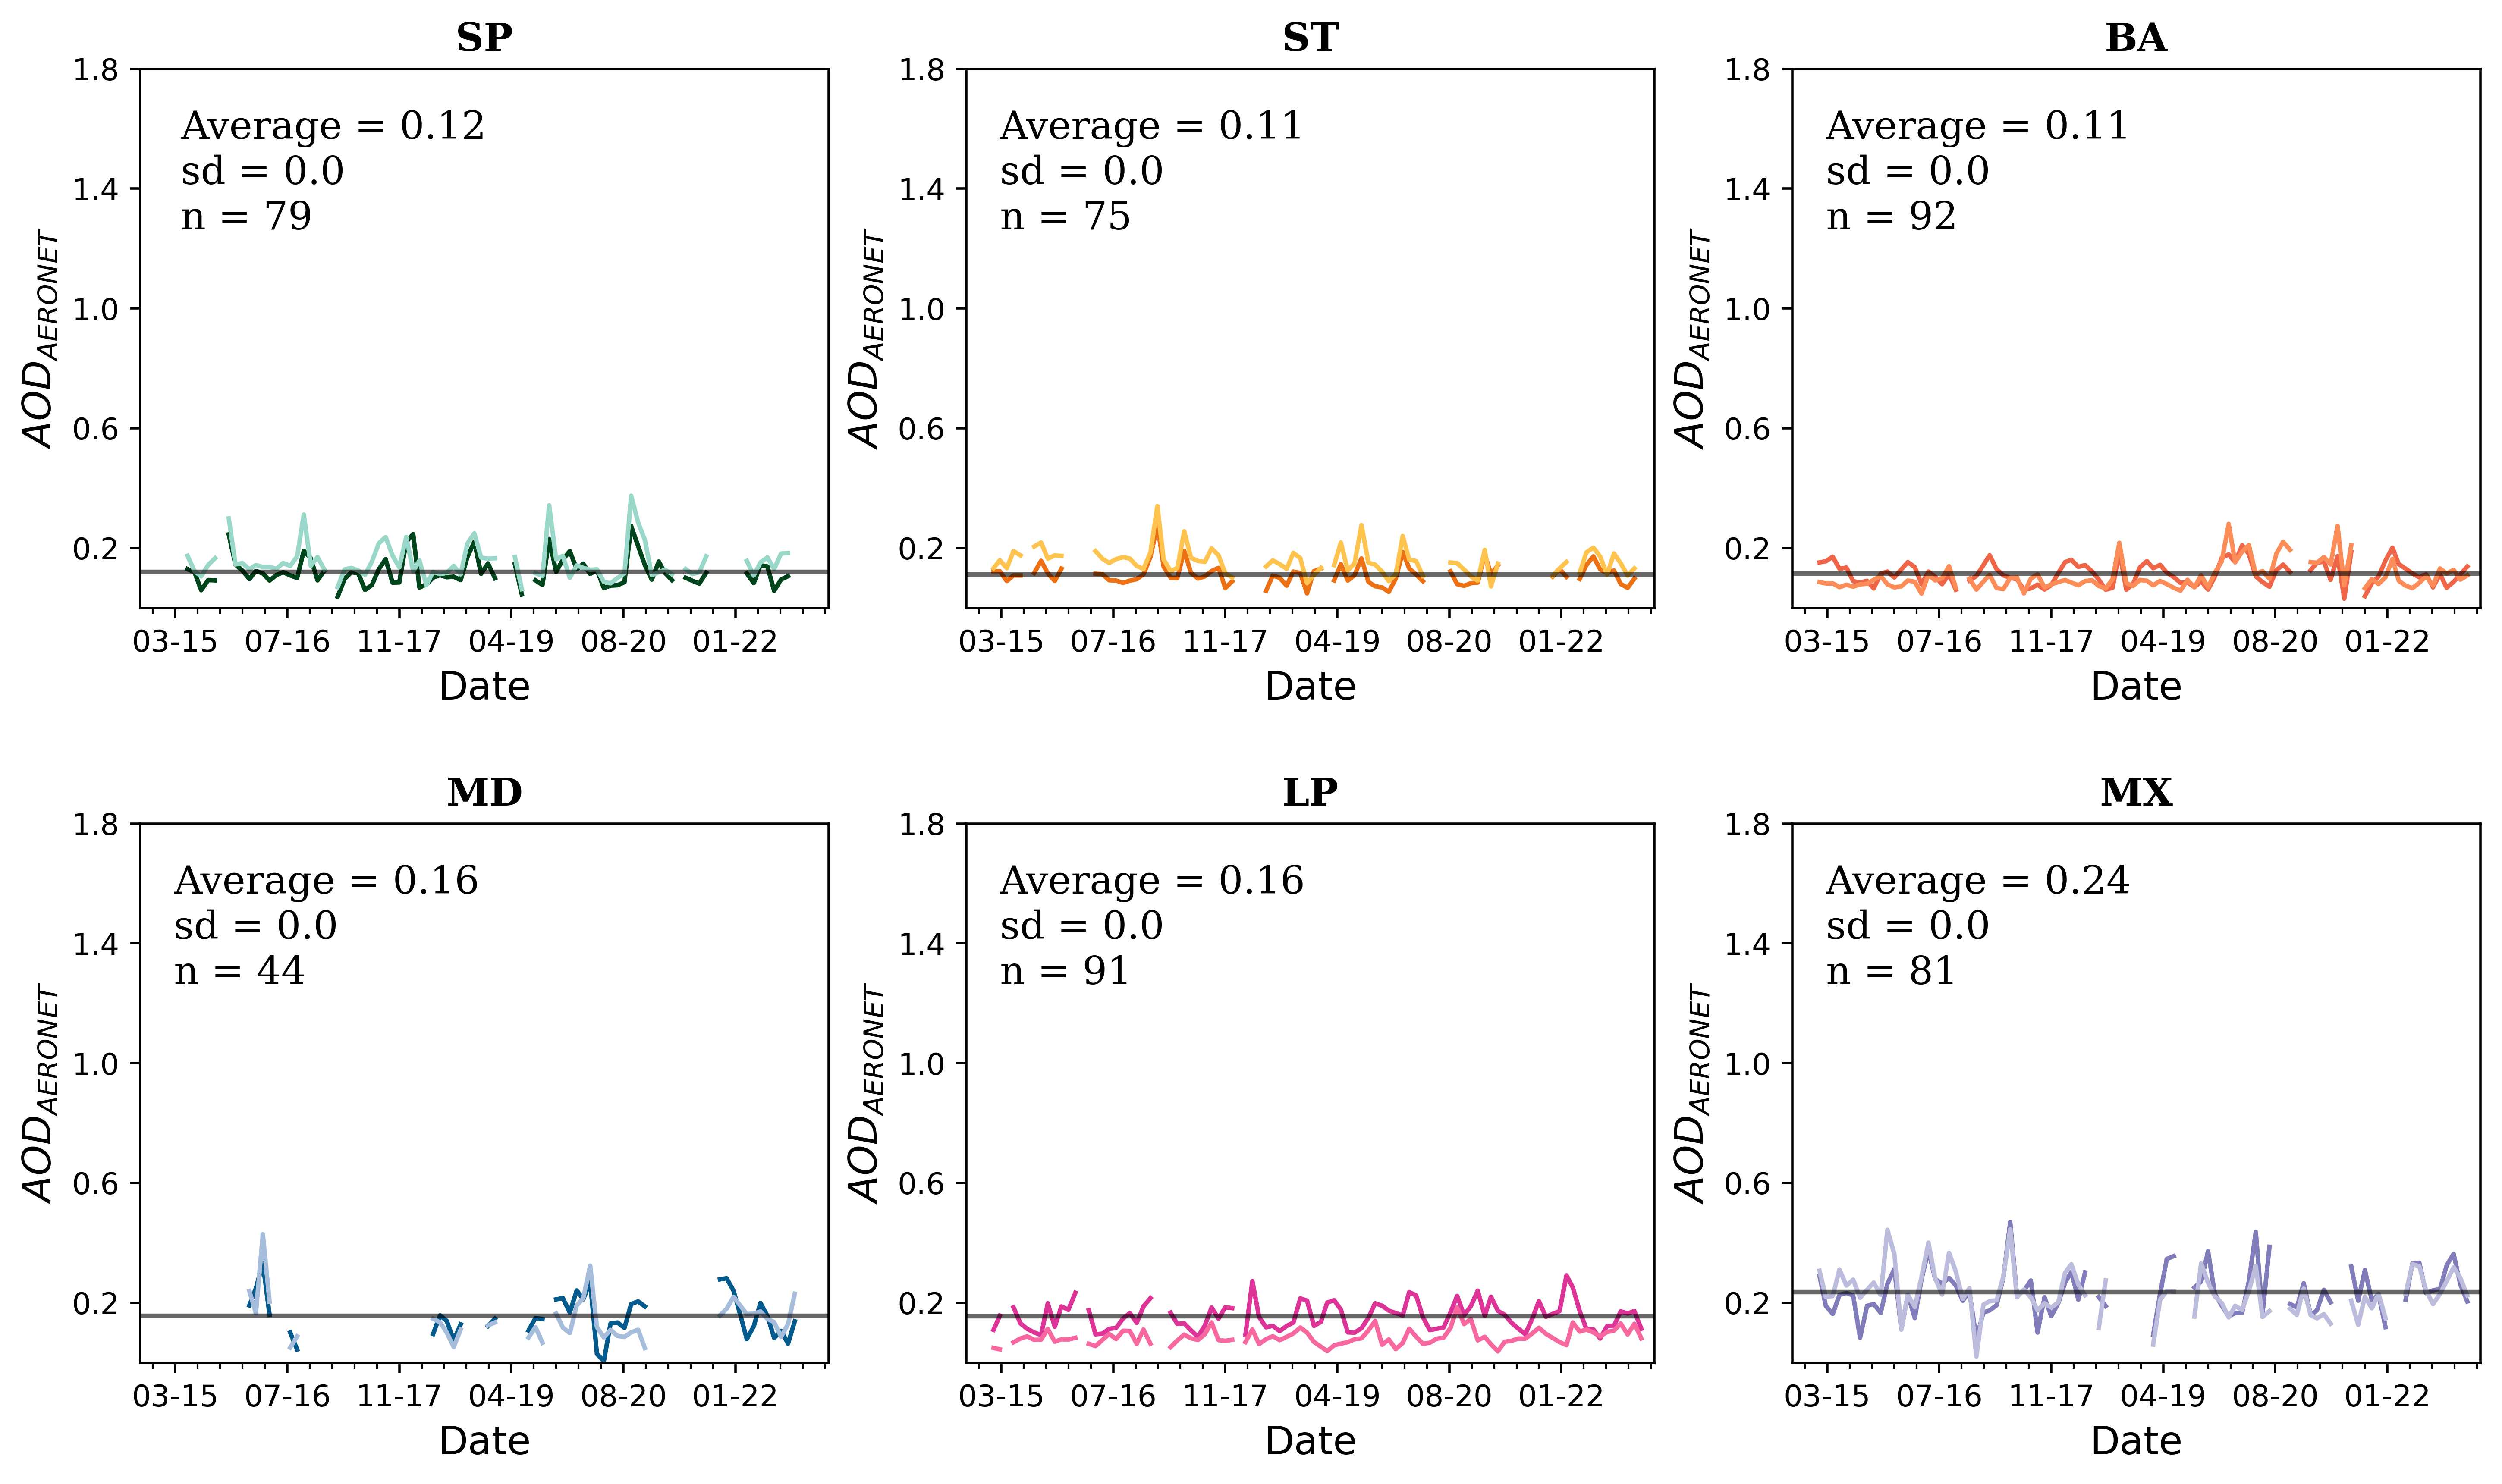

In [3]:
aeronet_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/merge_AER-MAIAC/Latam_C61/dia/1km/1km60min_copy",date_format='%Y-%m-%d',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='lala')


In [67]:
# AERONET station time series
def box_plot (path, date_format, nrows, ncols, colors, plot):
    '''
    The function allows plotting the daily averages of each AERONET station.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columns the plot will have
    - color palette for each of AERONET's stations For example: 
    colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
    '''
    i = 0 
    j = 0 
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14,8), dpi=500)
    colors = ["#00441b","#ec7014","#ef6548","#045a8d","#dd3497","#807dba"]
    colores = ["#99d8c9","#fec44f","#fc8d59", "#a6bddb","#f768a1","#bcbddc"]
    
    # The folder where the files of each station are located is browsed.
    for p, files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path, files))
        # A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x, date_format))
        # Becomes the index column
        data.set_index('Timestamp', inplace=True)
        # Media diaria
        data_mean_maiac = data['AOD_550_maiac_mean'].resample('1D').mean()
        data_mean_aer = data['AOD_550_AER_mean'].resample('1D').mean()
        
        # The days of the study period are completed
        data_mean_period_maiac = data_mean_maiac['2015-01-01':'2022-12-31']
        data_mean_period_aer = data_mean_aer['2015-01-01':'2022-12-31']
        data_mean_period_len = len(data_mean_maiac.dropna(how='all'))
        # Station Name
        station_name = files[2:4]
        print(files)
        Q1_data_mean_maiac = np.percentile(data_mean_period_maiac.dropna(), 25)
        Q2_data_mean_maiac = np.percentile(data_mean_period_maiac.dropna(), 50)  # Mediana
        Q3_data_mean_maiac = np.percentile(data_mean_period_maiac.dropna(), 75)
        rango_maiac = Q3_data_mean_maiac - Q1_data_mean_maiac

        print("Primer cuartil (Q1) _data_mean_maiac:", round(Q1_data_mean_maiac,2))
        print("Segundo cuartil (Q2, mediana) _data_mean_maiac:", round(Q2_data_mean_maiac,2))
        print("Tercer cuartil (Q3) _data_mean_maiac:", round(Q3_data_mean_maiac,2))
        print("Rango _data_mean_maiac:", round(rango_maiac,2))
        Q1_data_mean_aer = np.percentile( data_mean_period_aer.dropna(), 25)
        Q2_data_mean_aer = np.percentile( data_mean_period_aer.dropna(), 50)  # Mediana
        Q3_data_mean_aer = np.percentile( data_mean_period_aer.dropna(), 75)
        rango_aer = Q3_data_mean_aer - Q1_data_mean_aer
        print("Primer cuartil (Q1) data_mean_aer:", round(Q1_data_mean_aer,2))
        print("Segundo cuartil (Q2, mediana) data_mean_aer:", round(Q2_data_mean_aer,2))
        print("Tercer cuartil (Q3) data_mean_aer:", round(Q3_data_mean_aer,2))
        print("Rango _data_mean_aer:", round(rango_aer,2))
        ########################                PLOT                ########################
        # Figure
        flierprops = dict(marker='o', markerfacecolor=colors[p], markeredgecolor=colors[p],alpha=0.3, markersize=5, linestyle='none')
        ax[i][j].boxplot([data_mean_period_maiac.dropna(), data_mean_period_aer.dropna()],
                         labels=["MAIAC", "AERONET"], patch_artist=True,
                         boxprops=dict(facecolor=colors[p], color=colors[p]),
                         medianprops=dict(color="black"),
                         flierprops=flierprops)
        
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.5, 0.4))
        # Axes names
        ax[i][j].set_xlabel('Date', size=15)
        ax[i][j].set_ylabel('$AOD$', size=15)
        
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name, fontsize=16, fontdict={'family': 'serif', 
                                                                'color': 'Black', 
                                                                'weight': 'bold', 
                                                                'size': 20})
#         ax[i][j].legend(frameon = True, markerfirst = False, fontsize = 12,loc='upper right')
        # Configuration of subplots
        plt.subplots_adjust(left=0.125, bottom=0.15, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
        
        if j == ncols-1:
            i = i + 1
            j = 0
        else:
            j = j + 1

    # Save the plot to the current path
    if plot == 'save':
        plt.savefig("aeronet_boxplot.jpg", dpi=500)
    else:
        plt.show()

1_SP-1km-MAIAC-60-AER_MEAN_c61.csv
Primer cuartil (Q1) _data_mean_maiac: 0.06
Segundo cuartil (Q2, mediana) _data_mean_maiac: 0.1
Tercer cuartil (Q3) _data_mean_maiac: 0.14
Rango _data_mean_maiac: 0.08
Primer cuartil (Q1) data_mean_aer: 0.1
Segundo cuartil (Q2, mediana) data_mean_aer: 0.13
Tercer cuartil (Q3) data_mean_aer: 0.18
Rango _data_mean_aer: 0.09
2_ST-1km-MAIAC-60-AER_MEAN_c61.csv
Primer cuartil (Q1) _data_mean_maiac: 0.07
Segundo cuartil (Q2, mediana) _data_mean_maiac: 0.1
Tercer cuartil (Q3) _data_mean_maiac: 0.14
Rango _data_mean_maiac: 0.08
Primer cuartil (Q1) data_mean_aer: 0.1
Segundo cuartil (Q2, mediana) data_mean_aer: 0.14
Tercer cuartil (Q3) data_mean_aer: 0.18
Rango _data_mean_aer: 0.08
3_BA-1km-MAIAC-60-AER_MEAN_c61.csv
Primer cuartil (Q1) _data_mean_maiac: 0.07
Segundo cuartil (Q2, mediana) _data_mean_maiac: 0.1
Tercer cuartil (Q3) _data_mean_maiac: 0.14
Rango _data_mean_maiac: 0.07
Primer cuartil (Q1) data_mean_aer: 0.06
Segundo cuartil (Q2, mediana) data_mean_ae

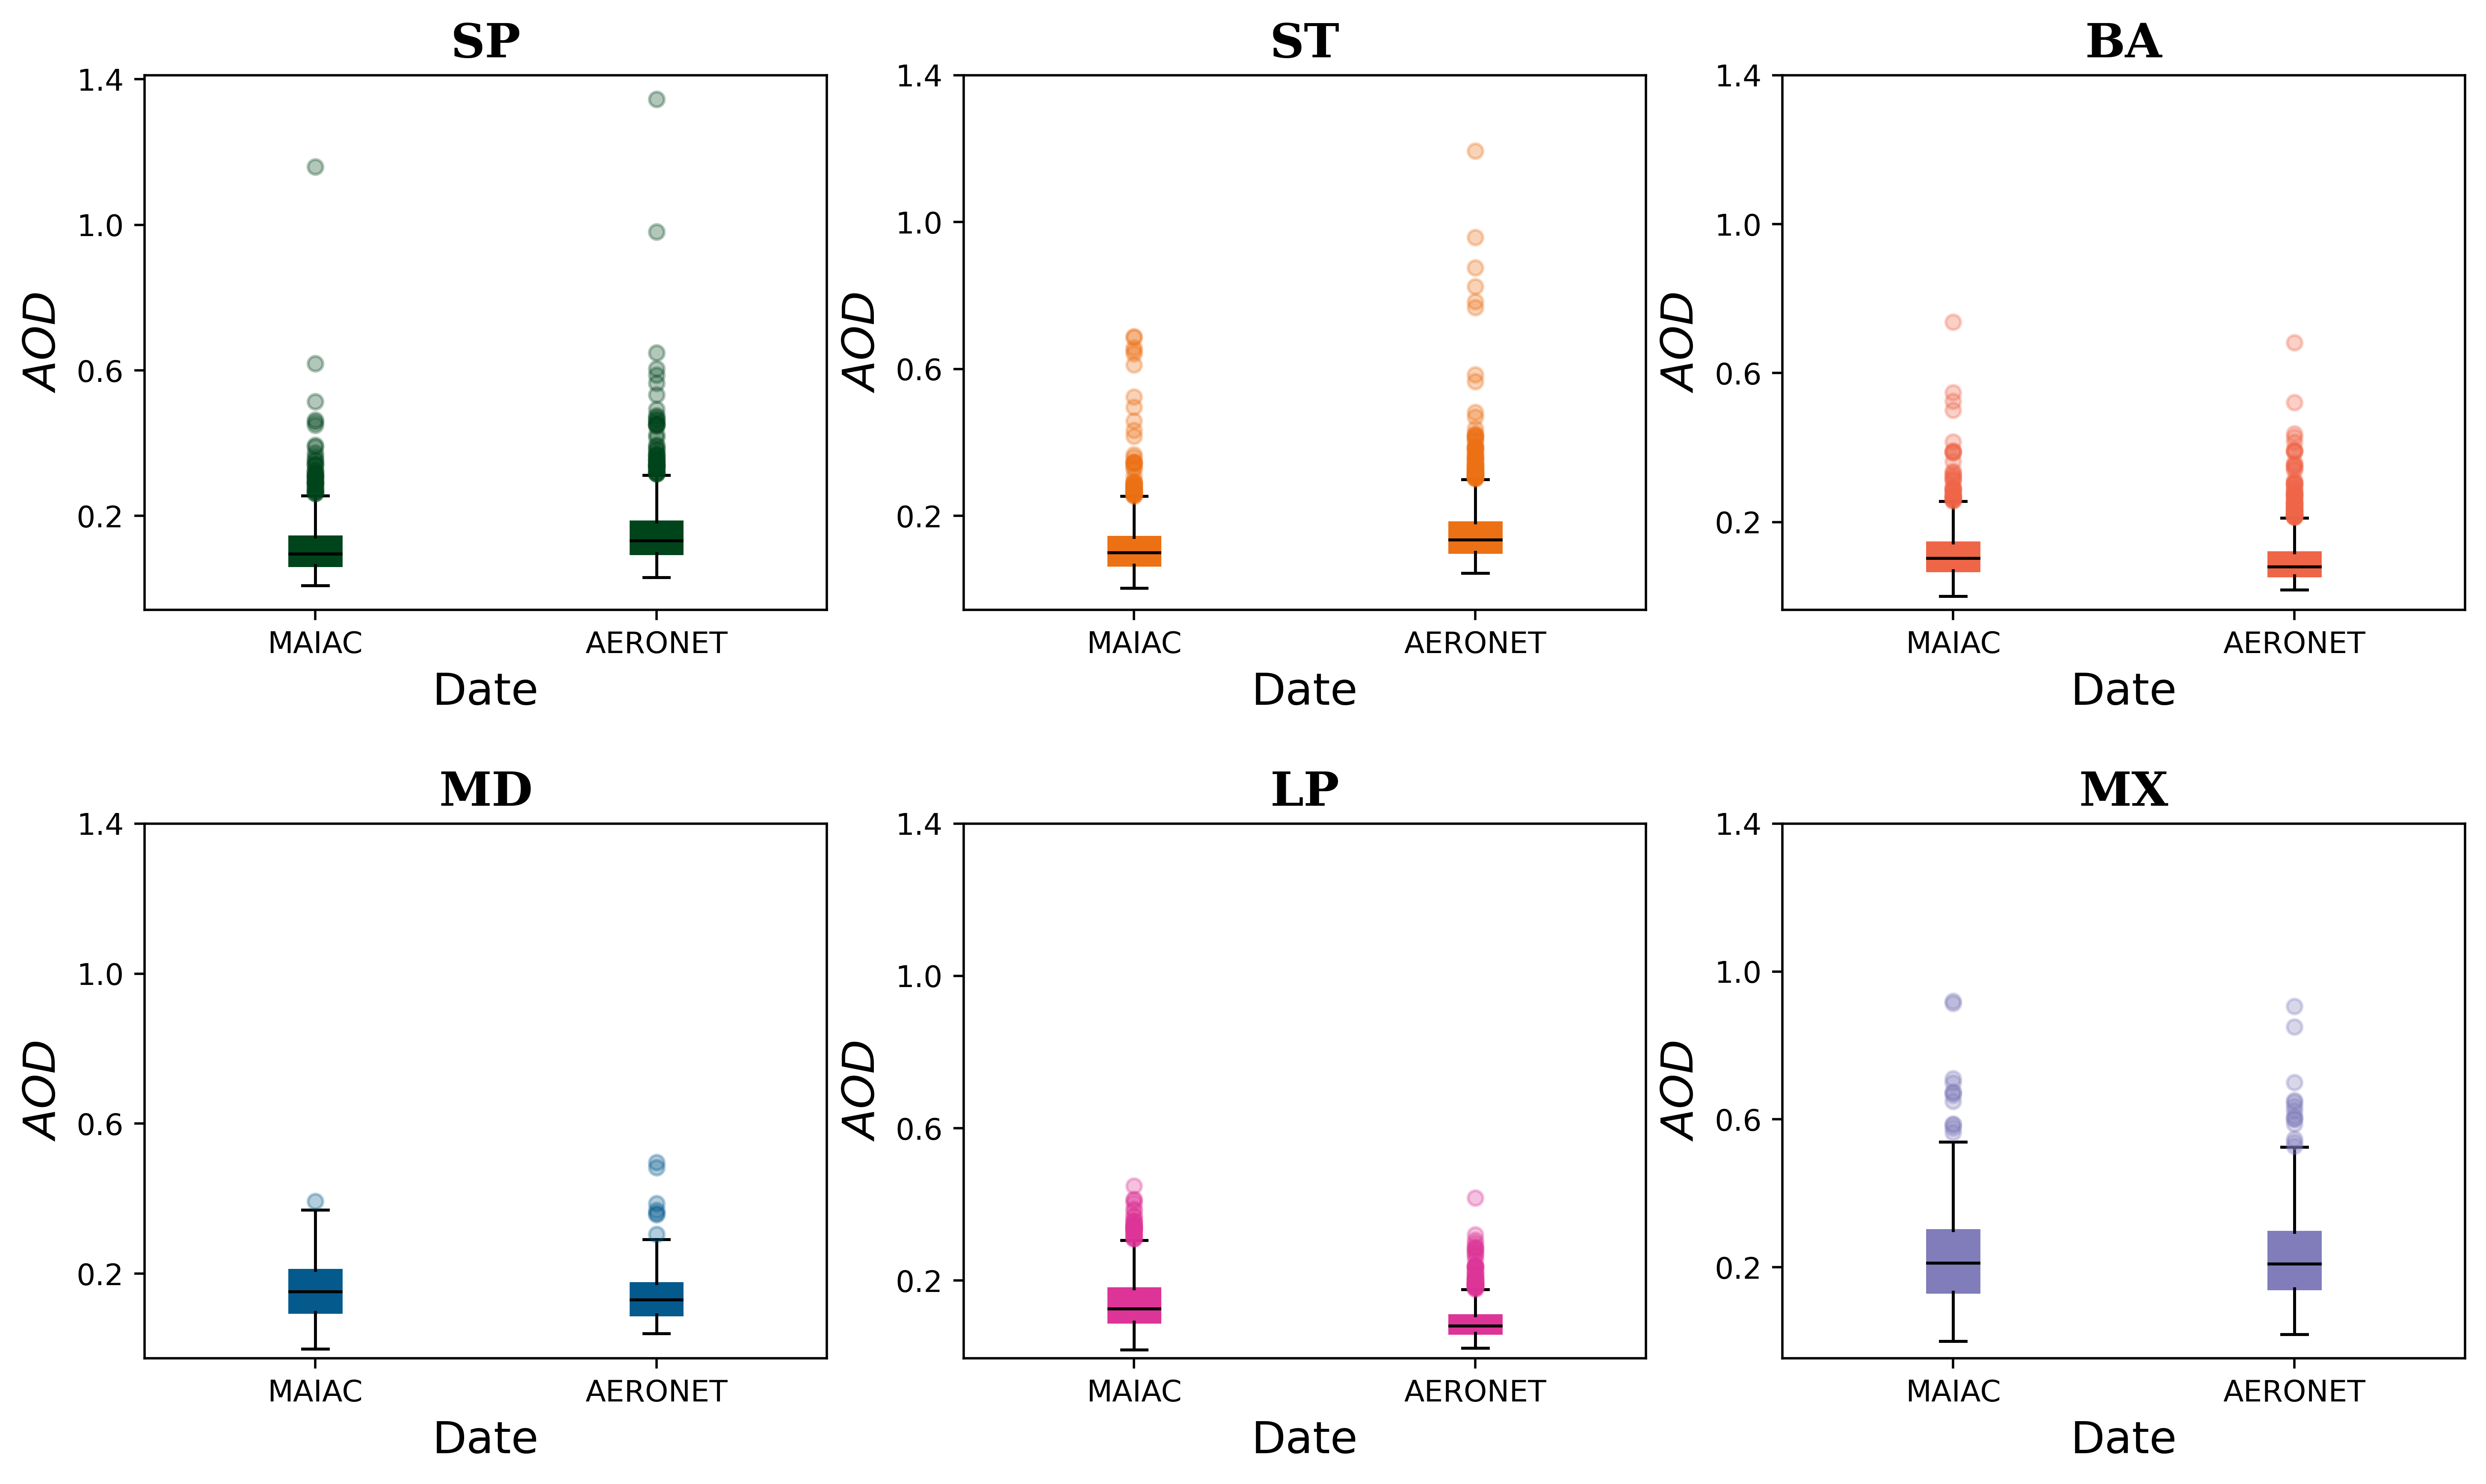

In [68]:
box_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/merge_AER-MAIAC/Latam_C61/dia/1km/1km60min_copy",date_format='%Y-%m-%d',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='lala')


1_SP-25km-MAIAC-60-AER_MEAN_c61.csv
Primer cuartil (Q1) _data_mean_maiac: 0.08
Segundo cuartil (Q2, mediana) _data_mean_maiac: 0.12
Tercer cuartil (Q3) _data_mean_maiac: 0.18
Rango _data_mean_maiac: 0.09
Primer cuartil (Q1) data_mean_aer: 0.1
Segundo cuartil (Q2, mediana) data_mean_aer: 0.14
Tercer cuartil (Q3) data_mean_aer: 0.2
Rango _data_mean_aer: 0.1
2_ST-25km-MAIAC-60-AER_MEAN_c61.csv
Primer cuartil (Q1) _data_mean_maiac: 0.07
Segundo cuartil (Q2, mediana) _data_mean_maiac: 0.09
Tercer cuartil (Q3) _data_mean_maiac: 0.13
Rango _data_mean_maiac: 0.07
Primer cuartil (Q1) data_mean_aer: 0.1
Segundo cuartil (Q2, mediana) data_mean_aer: 0.14
Tercer cuartil (Q3) data_mean_aer: 0.19
Rango _data_mean_aer: 0.09
3_BA-25km-MAIAC-60-AER_MEAN_c61.csv
Primer cuartil (Q1) _data_mean_maiac: 0.07
Segundo cuartil (Q2, mediana) _data_mean_maiac: 0.09
Tercer cuartil (Q3) _data_mean_maiac: 0.14
Rango _data_mean_maiac: 0.07
Primer cuartil (Q1) data_mean_aer: 0.06
Segundo cuartil (Q2, mediana) data_mea

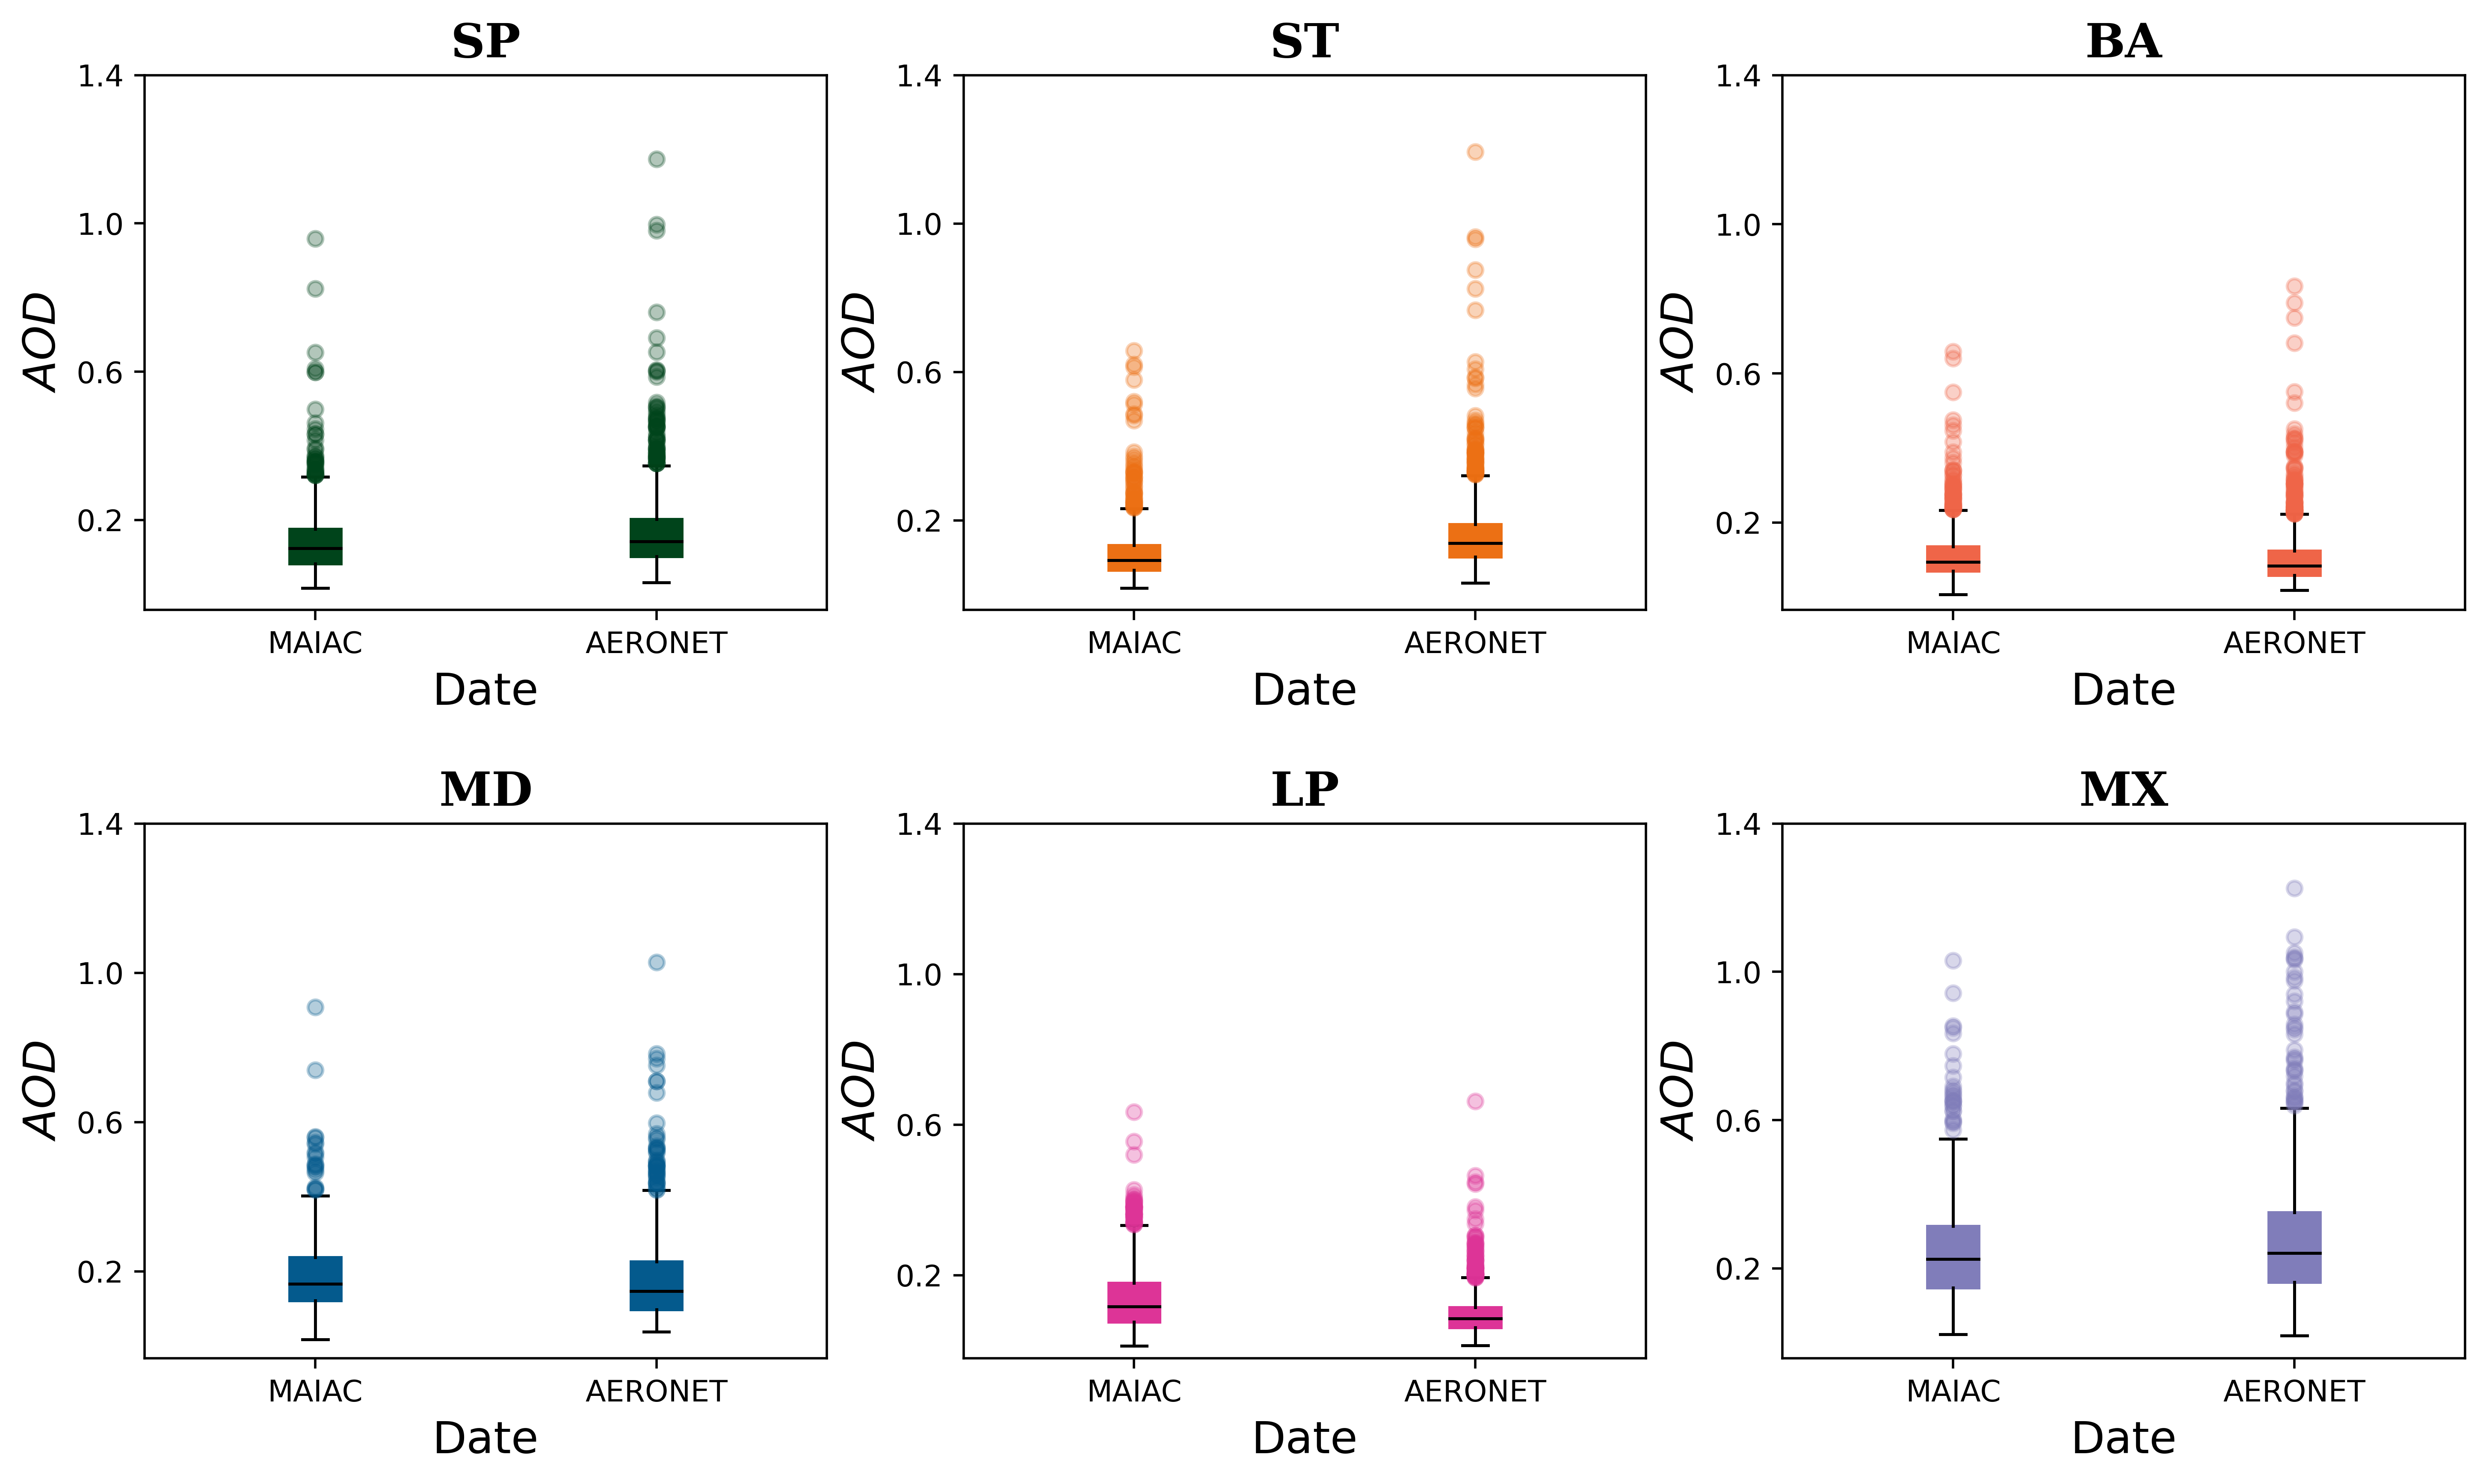

In [81]:
box_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/merge_AER-MAIAC/Latam_C61/dia/25km/25km60min_copy",date_format='%Y-%m-%d',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='lala')


1_GS-1km-MAIAC-60-AER_MEAN_c61.csv
2_GT-1km-MAIAC-60-AER_MEAN_c61.csv
3_MS-1km-MAIAC-60-AER_MEAN_c61.csv
4_CT-1km-MAIAC-60-AER_MEAN_c61.csv
5_SL-1km-MAIAC-60-AER_MEAN_c61.csv
6_UH-1km-MAIAC-60-AER_MEAN_c61.csv


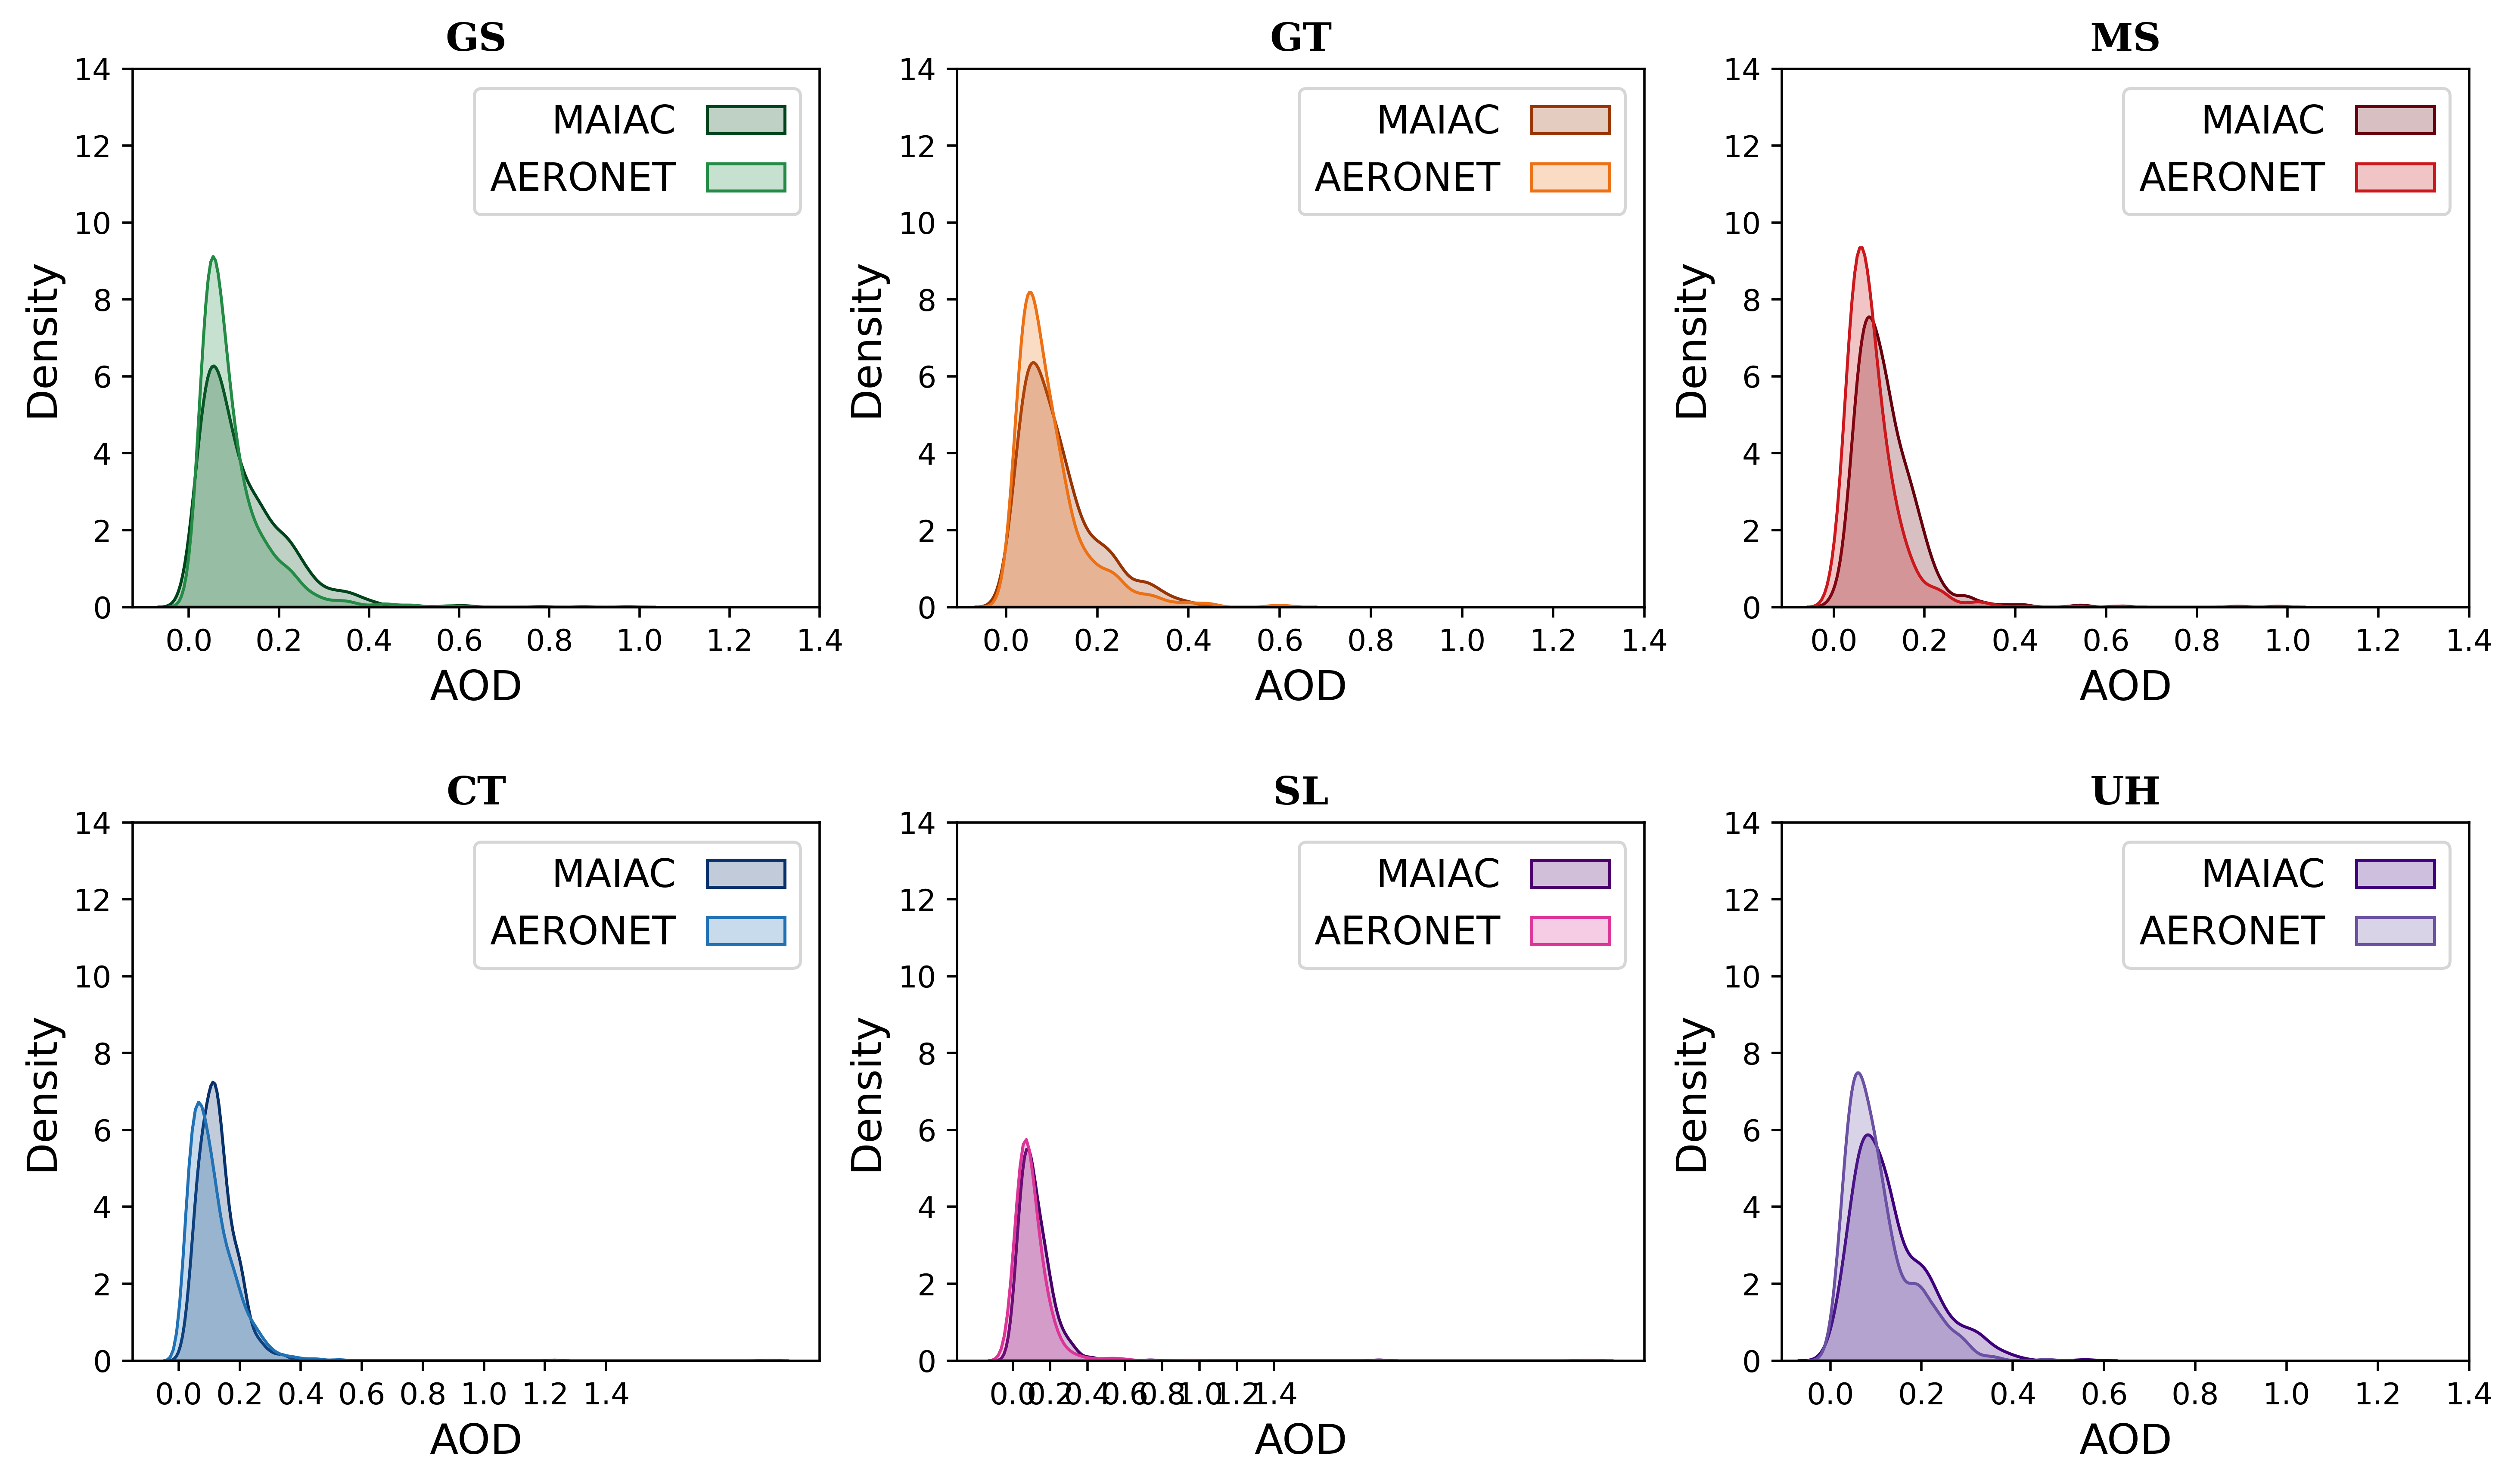

In [79]:
aeronet_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/merge_AER-MAIAC/USA_C61/dia/1km/1km60min_copy",date_format='%Y-%m-%d',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='lala')


In [77]:
import seaborn as sns
import numpy as np
from datetime import datetime

# AERONET station time series
def aeronet_plot(path, date_format, nrows, ncols, colors, plot):
    '''
    The function allows plotting the daily averages of each AERONET station.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columns the plot will have
    - color palette for each of AERONET's stations For example: 
    colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
    '''
    i = 0 
    j = 0 
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14,8), dpi=500)
#     colors = ["#00441b","#ec7014","#ef6548","#045a8d","#dd3497","#807dba"]
#     colores = ["#99d8c9","#fec44f","#fc8d59", "#a6bddb","#f768a1","#bcbddc"]
    colors =["#00441b","#993404","#67000d","#08306b","#49006a","#3f007d"]
    colores = ["#238b45","#ec7014","#cb181d","#2171b5","#dd3497","#6a51a3"] 
    
    # The folder where the files of each station are located is browsed.
    for p, files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path, files))
        # A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x, date_format))
        # Becomes the index column
        data.set_index('Timestamp', inplace=True)
        # Media diaria
        data_mean_maiac = data['AOD_550_maiac_mean'].resample('1D').mean()
        data_mean_aer = data['AOD_550_AER_mean'].resample('1D').mean()
        
        # The days of the study period are completed
        data_mean_period_maiac = data_mean_maiac['2015-01-01':'2022-12-31']
        data_mean_period_aer = data_mean_aer['2015-01-01':'2022-12-31']
        # Station Name
        station_name = files[2:4]
        print(files)
        
        ########################                PLOT                ########################
        # Figure
        sns.kdeplot(data_mean_period_maiac.dropna(), ax=ax[i][j], color=colors[p], label="MAIAC", shade=True)
        sns.kdeplot(data_mean_period_aer.dropna(), ax=ax[i][j], color=colores[p], label="AERONET", shade=True)
#         ax[i][j].hist(data_mean_period_maiac.dropna(), bins=30, color=colors[p], alpha=0.5, label="MAIAC")
#         ax[i][j].hist(data_mean_period_aer.dropna(), bins=30, color=colores[p], alpha=0.5, label="AERONET")
     
        # Axes names
        ax[i][j].set_xlabel('AOD', size=14)
        ax[i][j].set_ylabel('Frecuencia', size=14)
        
        # Axes names
        ax[i][j].set_xlabel('AOD', size=14)
#         ax[i][j].set_ylabel('Frecuencia', size=14)
        ax[i][j].set_ylabel('Density', size=14)
        
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name, fontsize=13, fontdict={'family': 'serif', 
                                                                'color': 'Black', 
                                                                'weight': 'bold', 
                                                                'size': 24})
        ax[i][j].yaxis.set_ticks(np.arange(0, 16, 2))
#         ax[i][j].yaxis.set_ticks(np.arange(0, 360, 50))
        ax[i][j].xaxis.set_ticks(np.arange(0, 1.5, 0.2))
        ax[i][j].legend(frameon = True, markerfirst = False, fontsize = 13,loc='upper right')
        # Configuration of subplots
        plt.subplots_adjust(left=0.125, bottom=0.15, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
        
        if j == ncols-1:
            i = i + 1
            j = 0
        else:
            j = j + 1

    # Save the plot to the current path
    if plot == 'save':
        plt.savefig("aeronet_density_plot.jpg", dpi=500)
    else:
        plt.show()

1_SP-1km-MAIAC-60-AER_MEAN_c61.csv
2_ST-1km-MAIAC-60-AER_MEAN_c61.csv
3_BA-1km-MAIAC-60-AER_MEAN_c61.csv
4_MD-1km-MAIAC-60-AER_MEAN_c61.csv
5_LP-1km-MAIAC-60-AER_MEAN_c61.csv
6_MX-1km-MAIAC-60-AER_MEAN_c61.csv


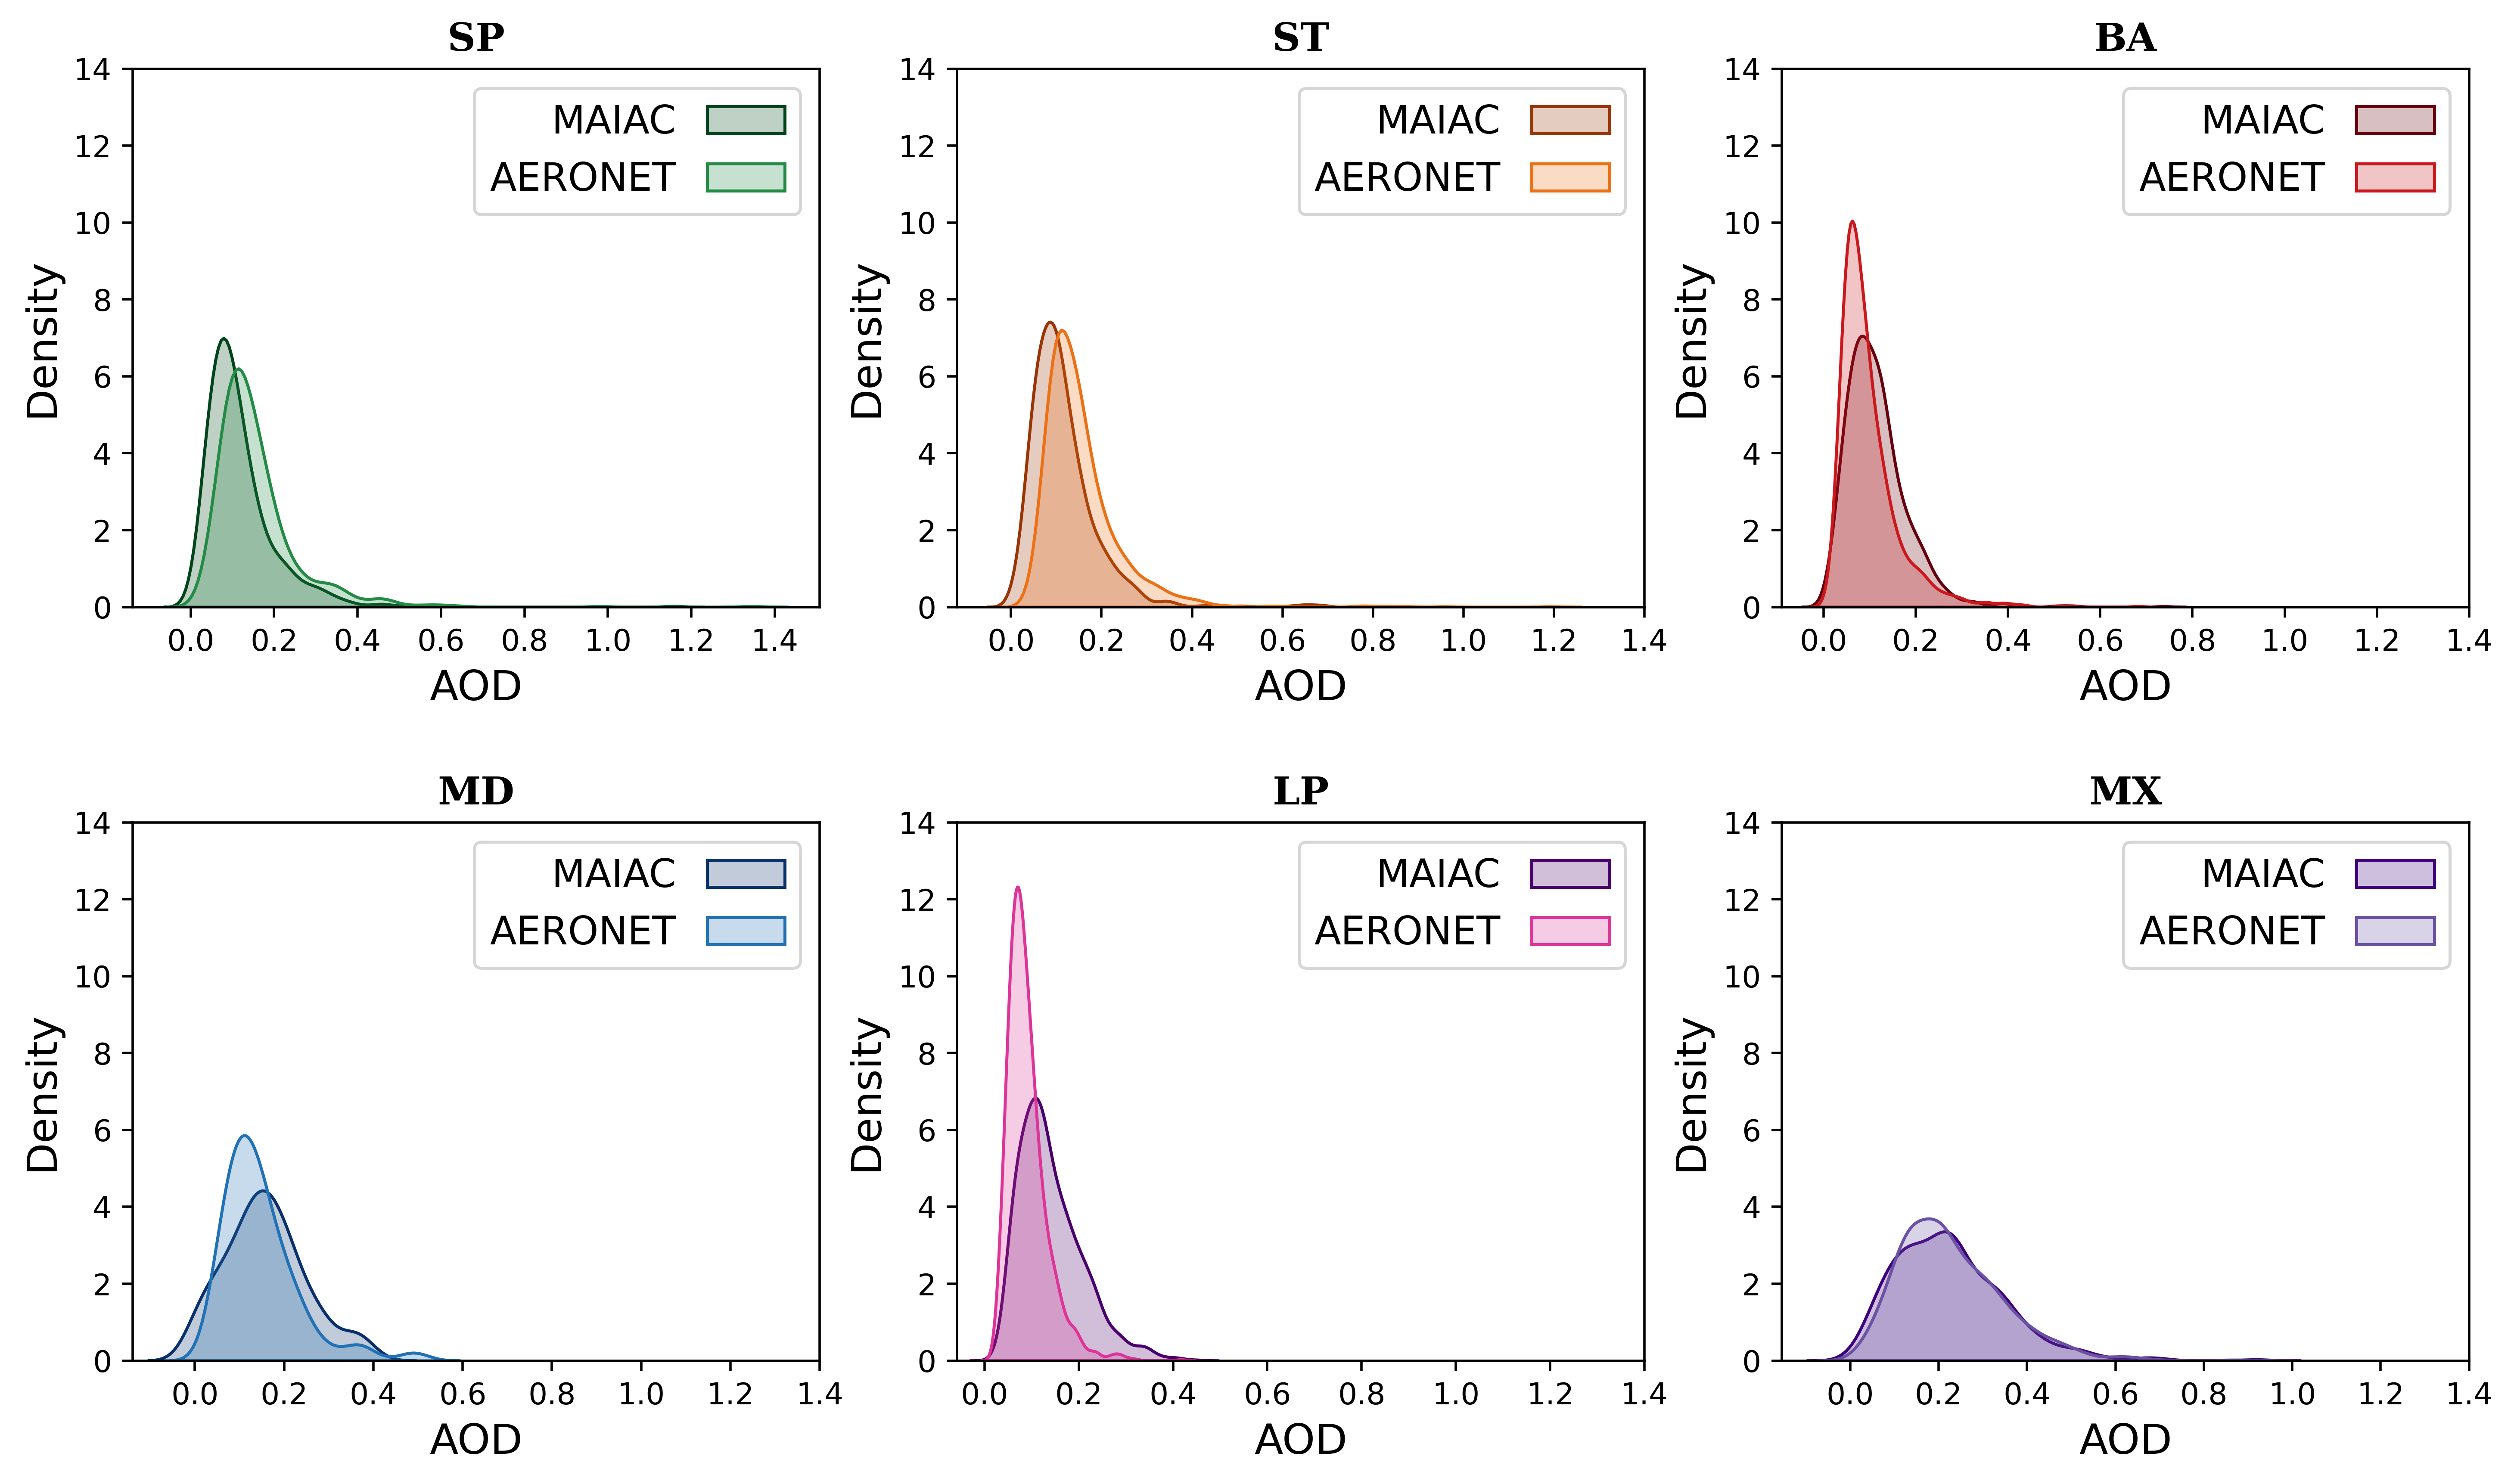

In [78]:
aeronet_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/merge_AER-MAIAC/Latam_C61/dia/1km/1km60min_copy",date_format='%Y-%m-%d',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='lala')


In [138]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# AERONET station time series
def aeronet_plot(path, date_format, nrows, ncols, colors, plot):
    '''
    The function allows plotting the daily averages of each AERONET station.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columns the plot will have
    - color palette for each of AERONET's stations For example: 
    colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
    '''
    i = 0 
    j = 0 
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14,8), dpi=500)
    colors = ["#00441b","#ec7014","#ef6548","#045a8d","#dd3497","#807dba"]
    colores = ["#99d8c9","#fec44f","#fc8d59", "#a6bddb","#f768a1","#bcbddc"]
    bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, np.inf]
    print(bins)
    # The folder where the files of each station are located is browsed.
    for p, files in enumerate(os.listdir(path)):
        data = pd.read_csv(os.path.join(path, files))
        # A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x, date_format))
        # Becomes the index column
        data.set_index('Timestamp', inplace=True)
        # Media diaria
        data_mean_maiac = data['AOD_550_maiac_mean'].resample('1D').mean()
        data_mean_aer = data['AOD_550_AER_mean'].resample('1D').mean()
        
        # The days of the study period are completed
        data_mean_period_maiac = data_mean_maiac['2015-01-01':'2022-12-31']
        data_mean_period_aer = data_mean_aer['2015-01-01':'2022-12-31']
        
        # Calculate bias
        data_bias = data_mean_period_aer - data_mean_period_maiac
        
        # Binning the data
        binned_data = pd.cut(data_mean_period_maiac, bins=bins)
        
        boxplot_data = [data_bias[binned_data == bin].dropna() for bin in binned_data.cat.categories]
        
        # Station Name
        station_name = files[2:4]
        print(files)
        
        ########################                PLOT                ########################
        # Figure
        flierprops = dict(marker='o', markerfacecolor=colors[p], markeredgecolor='none', alpha=0.3, markersize=4, linestyle='none')
        ax[i][j].boxplot(boxplot_data,
                         labels=[f"{bin}" for bin in binned_data.cat.categories],
                         patch_artist=True,
                         boxprops=dict(facecolor=colors[p], color=colors[p]),
                         medianprops=dict(color="black"),
                         flierprops=flierprops)
        
        # Axes names
        ax[i][j].yaxis.set_ticks(np.arange(-0.4, 0.55, 0.1))
        ax[i][j].set_xlabel('Bins', size=13)
        ax[i][j].set_ylabel('Bias (AERONET - MAIAC)', size=10)
        
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name, fontsize=13, fontdict={'family': 'serif', 
                                                                'color': 'Black', 
                                                                'weight': 'bold', 
                                                                'size': 20})
        # Set x-ticks and labels
        d =  [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,'>0.8']
#         xtick_labels =np.arange(0.1, 0.9, 0.2).tolist() + ['>0.8']
#         print(xtick_labels)
#         ax[i][j].set_xticks(range(1, len(xtick_labels) + 1))
        ax[i][j].set_xticklabels(d, size=9)
#         ax[i][j].xaxis.set_ticks(np.arange(0, 1.65, 0.2))
        # Axes names
        ax[i][j].set_xlabel('AOD Bins', size=13)
        ax[i][j].set_ylabel('Bias (AERONET - MAIAC)', size=13)
        # Configuration of subplots
        plt.subplots_adjust(left=0.125, bottom=0.15, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
        
        if j == ncols-1:
            i = i + 1
            j = 0
        else:
            j = j + 1

    # Save the plot to the current path
    if plot == 'save':
        plt.savefig("aeronet_boxplot_bias_bins.jpg", dpi=500)
    else:
        plt.show()


[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, inf]
1_SP-1km-MAIAC-60-AER_MEAN_c61.csv
2_ST-1km-MAIAC-60-AER_MEAN_c61.csv
3_BA-1km-MAIAC-60-AER_MEAN_c61.csv
4_MD-1km-MAIAC-60-AER_MEAN_c61.csv
5_LP-1km-MAIAC-60-AER_MEAN_c61.csv
6_MX-1km-MAIAC-60-AER_MEAN_c61.csv


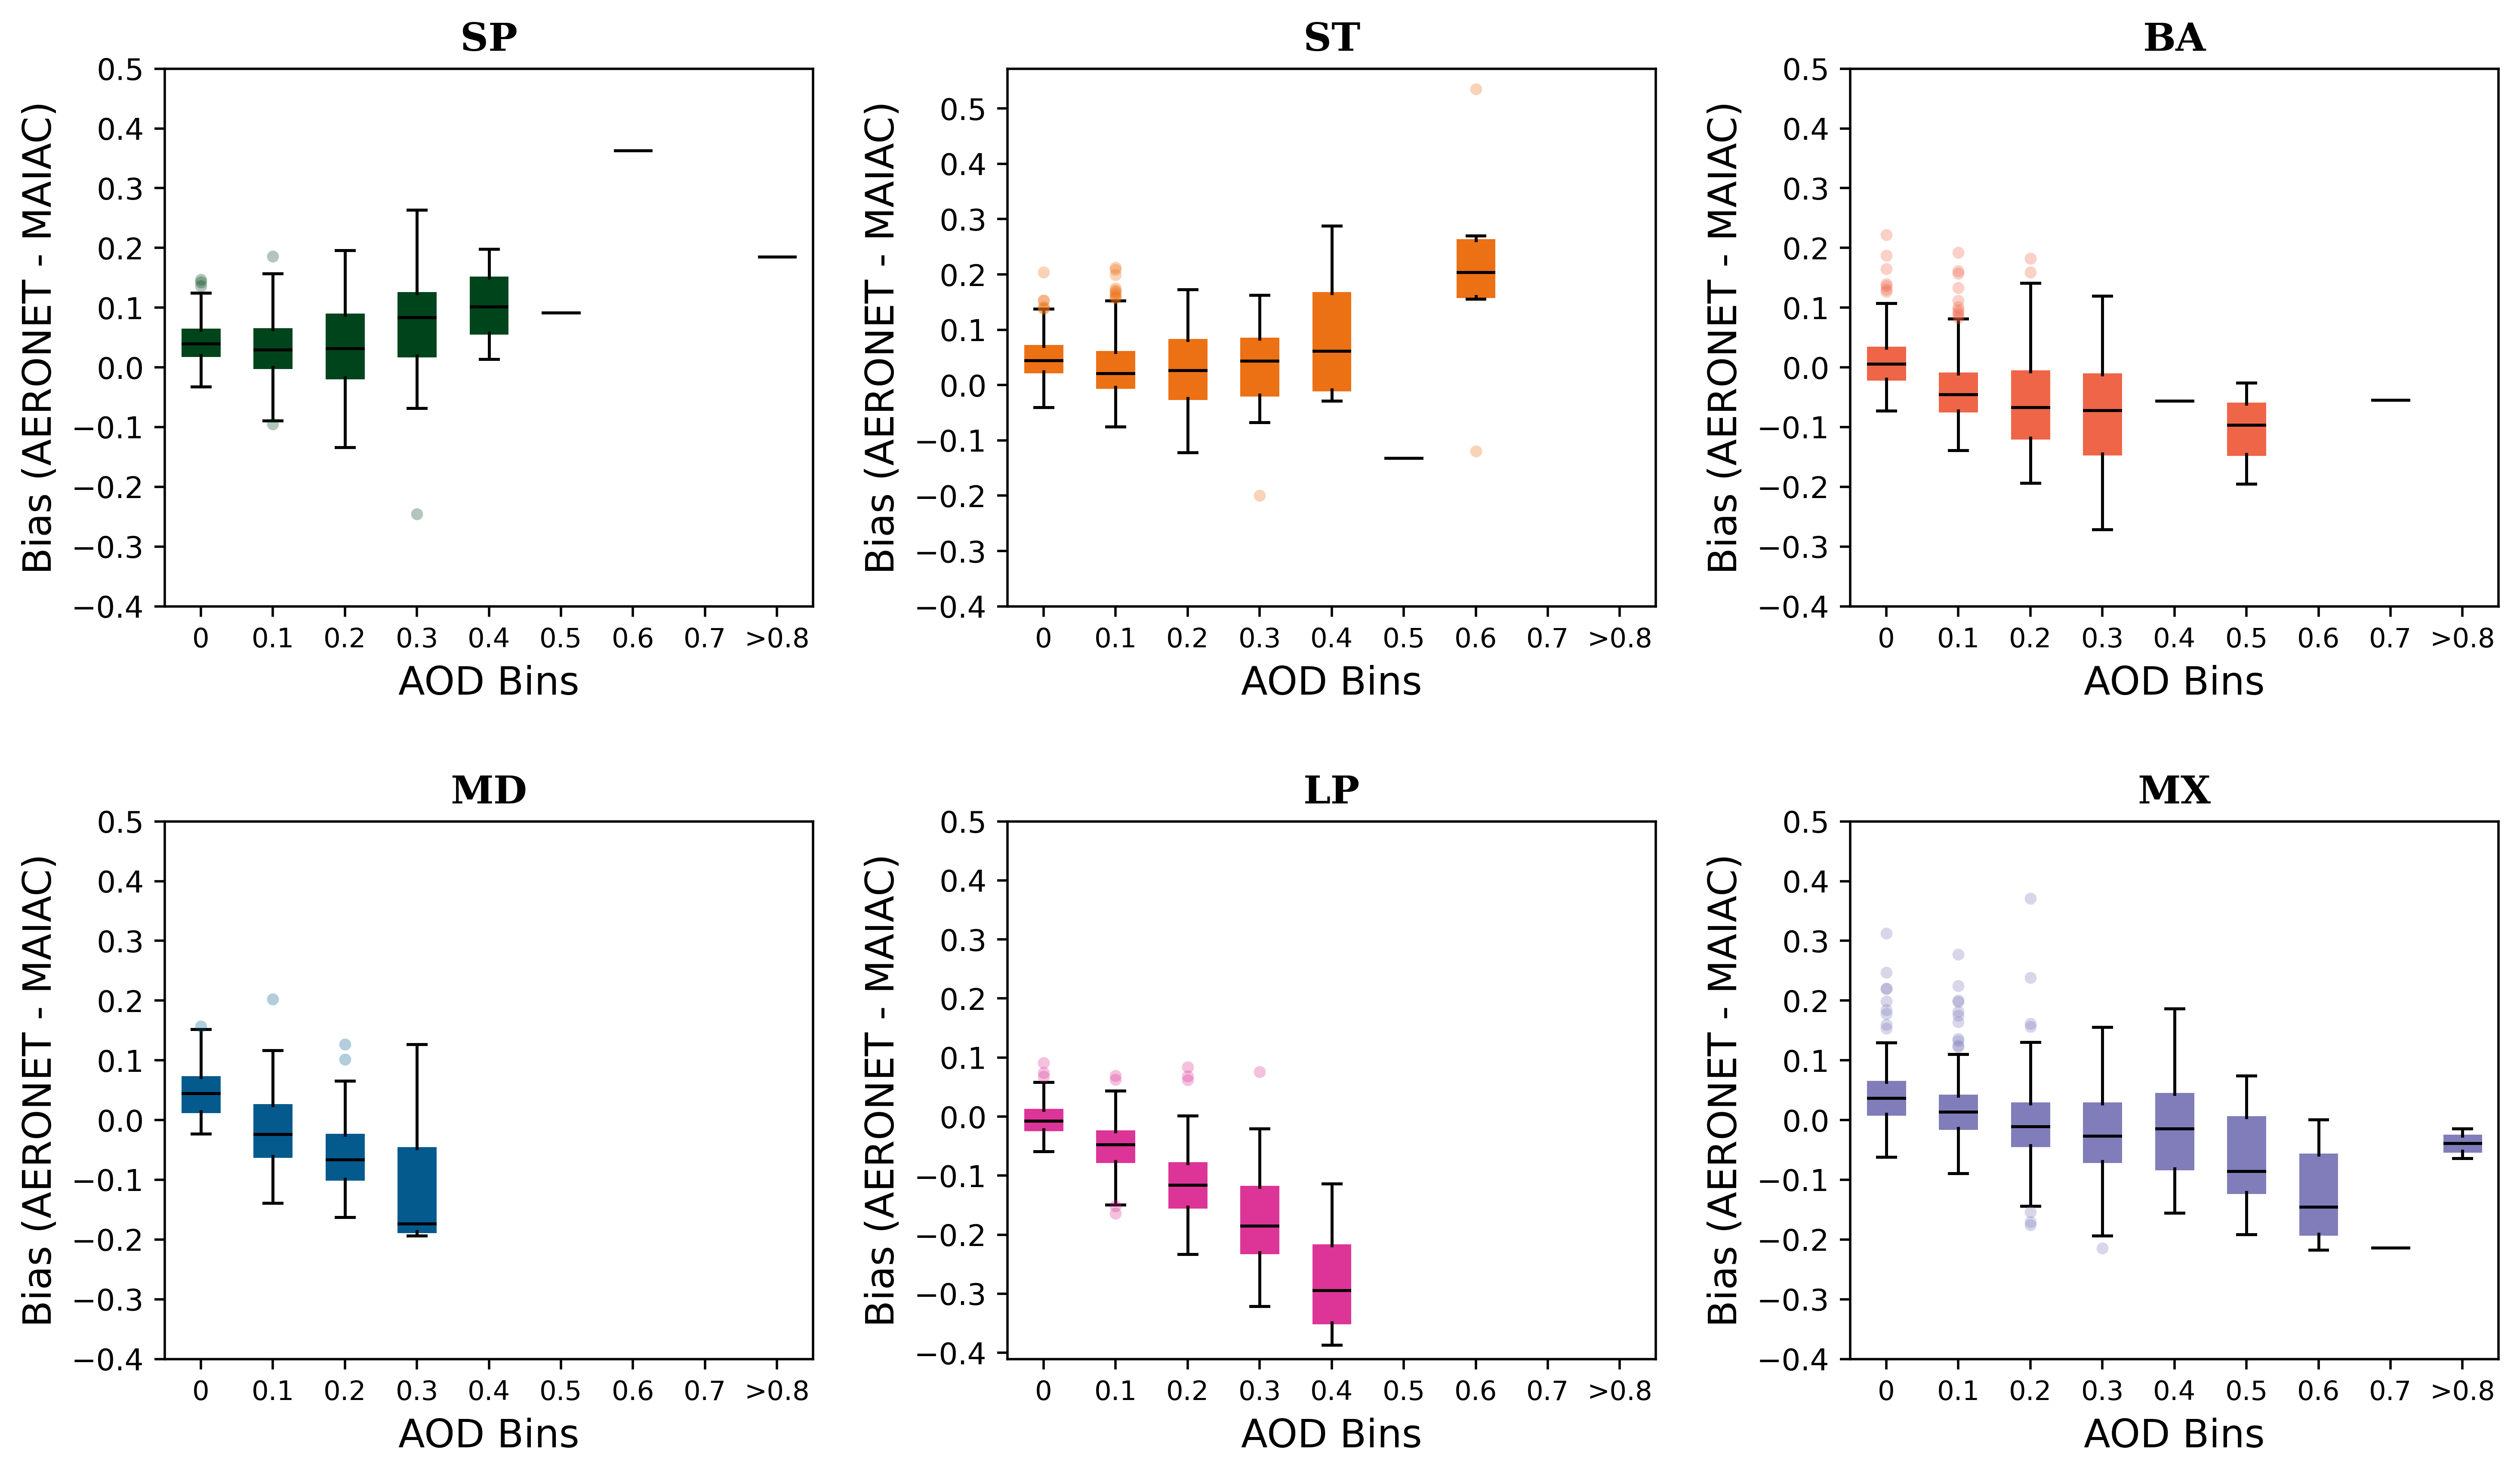

In [139]:
aeronet_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/merge_AER-MAIAC/Latam_C61/dia/1km/1km60min_copy",date_format='%Y-%m-%d',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='lala')
